# EARIN Project - G27 (Marta Tolsà & Thomas Jost)
## Phase 1: Preliminary Documentation

### Preliminary report

### 1. Description of the dataset 

This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. 

Using spatial econometric methods, we analyse and identify the determinants of Airbnb prices across these cities. 

Our dataset includes information such as:
- **realSum** (the total price of the Airbnb listing)

- **room_type** (the type of room available in the listing: "private","shared", "entire home/apt", indicating wheter guests have exclusive access to the entire property or if they will be sharing the space with others)

- **room_shared** (binary indicator (0/1) that specifies wheter the room is shared with other guests)

- **room_private** (binary indicator (0/1) that specifies wheter the room is private, meaning it is not shared with other guests)

- **person_capacity** (the maximum number of people that can be accommodated in the listing)

- **host_is_superhost** (boolean value indicating if host is a superhost or not. Superhosts are recognized for providing exceptional experiences to guests)

- **multi** (indicator (0/1) of whether the listing is for multiple rooms or not)

- **biz** (business indicator, providing information about wheter the listing is primarily intended for business purposes)

- **cleanliness_rating** (the satisfaction of previous guests with the cleanliness of the accomodation)

- **guest_satisfaction_overall** (the overall rating provided by guests, comparing all the listings offered by the host. It captures the overall satisfaction level of guests)

- **bedrooms** (number of bedrooms available in the listing)

- **dist** (distance from the city center. It provides information on the proximity of the accomodation to the central area of the city) 

- **metro_dist** (distance from the nearest metro station, providing insights into the accessibility of public transportation)

- **attr_index** (index or score related to the attractiveness of the location or surrounding area)

- **attr_index_norm** (normalized version of the attr_index, which standardizes the values for easier comparison)

- **rest_index** (index or score related to the availability of restaurants or dining options in the vicinity of the listing)

- **rest_index_norm** (normalized version of the rest_index)

- **lng** (the longitude coordinates for location identification)

- **lat** (the latitude coordinates for location identification) 

This data set could offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability.

### 2. Overview of our plan to tackle this problem

### a) How to split the dataset into training and validation set

To split our dataset into a training set and a validation set, we can:

**1) We determine the desired ratio for the split between the training and validation sets.** This ratio depends on factors such as the size of our dataset, the complexity of our model, and the availability of data for evaluation. A common ratio is 80% for training and 20% for validation.

**2) We calculate the number of samples to allocate for each set based on the desired ratio.** In this case, for a 80-20 split, we would assign approximately 80% of the data to the training set and 20% to the validation set.

Training set size = 80% * Total number of rows
Validation set size = 20% * Total number of rows

For our dataset with 51,707 rows:
Training set size ≈ 0.8 * 51,707
Validation set size ≈ 0.2 * 51,707

**3) We randomly shuffle the rows of our dataset to ensure that the samples are not biased in any particular order.** This step is crucial to prevent any patterns or biases in the original data from carrying over into the split.

**4) Select the first n rows (where n is the calculated training set size) as our training set.** These rows will represent the samples used for training your model.

**5) Select the remaining rows as our validation set.** These rows will be used to evaluate your model's performance.


### b) A short description of the algorithms that will be used, along with some examples.

**1. Spatial Analysis:**
- **Spatial clustering (K-means clustering using scikit-learn):** this algorithm can be used to identify spatial clusters of similar Airbnb across Europe. It helps in finding regions or cities with comparable pricing patterns.













**2. Time Series Analysis:**


- **ARIMA (AutoRegressive Integrated Moving Average using statsmodels):** this algorithm can be employed to forecast future rental rates based on historical patterns. We can take into account the autoregressive and moving average components of the time series data.

- **Time series regression (OLS regression using statsmodels):** this method can be used to analyze the relationship between Airbnb prices and factors such as weekdays/weekends, holidyas, or other relevant variables. It helps in understanding the differences in booking patterns and their impact on rental rates.


### c) Main tools/frameworks/libraries used for implementation


The main tools, frameworks, and libraries commonly used for implementing spatial analysis, time series analysis, and spatial econometrics are:

**1. Spatial Analysis:**

- **Scikit-learn:** A machine learning library that includes clustering algorithms such as KMeans and regression models for spatial analysis.

**2. Time Series Analysis:**

- **Statsmodels:** A library that provides various statistical models and methods for time series analysis, including seasonal decomposition and ARIMA models.

- **Prophet:** A time series forecasting library developed by Facebook, which provides an implementation of additive regression models.

- **PyFlux:** A library for time series analysis and forecasting, which offers advanced models such as state space models and Bayesian structural time series.





Fisrt, we load the data:

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/project-ai/README.md
/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv
/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv
/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv
/kaggle/input/ai

**IMPORT NECESSARY LIBRARIES**

- **pandas:** A powerful library for data manipulation and analysis. It provides data structures and functions to efficiently work with structured data, such as CSV files or database tables. It allows for data cleaning, transformation, and aggregation operations.

- **numpy:** A fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. It is widely used for mathematical and statistical operations.

- **matplotlib.pyplot:** A plotting library that provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python. It is commonly used to create various types of charts, histograms, scatter plots, and more.

- **seaborn:** A data visualization library built on top of matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics. Seaborn simplifies the process of creating complex visualizations and supports various types of plots, such as heatmaps, violin plots, and bar plots.

- **math:** A built-in Python module that provides mathematical functions and constants. It includes functions like square root, logarithm, trigonometric functions, and more.

- **xgboost:** A popular library for gradient boosting algorithms. XGBoost stands for "eXtreme Gradient Boosting" and is known for its high performance and scalability. It is often used for regression and classification tasks and supports various advanced features, such as regularization and handling missing values.

- **sklearn.preprocessing:** A module from the scikit-learn library that provides various data preprocessing techniques, such as scaling, encoding categorical variables, and generating polynomial features.

- **sklearn.model_selection:** A module from scikit-learn that provides tools for model selection and evaluation, including functions for splitting data into training and test sets, performing cross-validation, and hyperparameter tuning using grid search.

- **sklearn.feature_selection:** A module from scikit-learn that provides methods for selecting the most relevant features from a dataset. It includes techniques like Sequential Feature Selection (SFS) and Select From Model.

- **sklearn.linear_model:** A module from scikit-learn that provides linear regression models, including Ordinary Least Squares (OLS), Ridge, and Lasso regression.

- **sklearn.tree:** A module from scikit-learn that provides decision tree-based models, such as Decision Tree Regressor, which uses decision trees for regression tasks.

- **sklearn.ensemble:** A module from scikit-learn that provides ensemble learning methods, including Random Forest Regressor. Ensemble methods combine multiple models to make more accurate predictions.

- **sklearn.metrics:** A module from scikit-learn that provides various metrics to evaluate model performance. It includes metrics like Mean Squared Error (MSE) and R-squared (coefficient of determination).

Then, we import many of the libraries that will be necessary to solve our goal:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector,SelectFromModel
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import warnings

### d) Proposed evaluation methods. How to measure and compare the performance of your algorithm.

We can consider the following evaluation methods:

- **Mean Squared Error (MSE):** MSE measures the average squared difference between the predicted and actual Airbnb prices. A lower MSE indicates better predictive performance.

- **R-squared (coefficient of determination):** R-squared measures the proportion of the variance in the dependent variable (Airbnb prices) that can be explained by the independent variables (determinants). A higher R-squared value indicates a better fit of the model to the data.

- **Cross-Validation:** We can split our dataset into training and validation sets and perform cross-validation. This involves training the model on a subset of the data and evaluating its performance on the remaining data. Cross-validation helps estimate the model's generalization performance and identify potential issues with overfitting or underfitting.

- **Out-of-Sample Testing:** After training our model on a portion of the dataset, we can evaluate its performance on a completely independent dataset. This provides a more realistic assessment of the model's ability to predict Airbnb prices in new and unseen locations.

- **Residual Analysis:** We can analyze the residuals (the differences between the predicted and actual prices) to check for patterns or biases in the model's predictions. Residual plots can reveal if there are any systematic errors or heteroscedasticity in the model.

- **Comparative Analysis:** Compare the performance of different spatial econometric models, such as Spatial Durbin Model, Spatial Lag Model, or Geographically Weighted Regression. We will assess their goodness of fit measures (e.g., AIC, BIC) and will compare the estimated coefficients and their significance to understand the effectiveness of different models in capturing the determinants of Airbnb prices.


Additionally, we could analyze how well our model captures the differences in prices between weekdays and weekends or conduct sensitivity analysis by testing the robustness of our model to variations in the dataset or assumptions.

### e) General plan of tests/experiments.

The general plan of tests/experiments could be as follows:

**1. Data cleaning and preprocessing:** Before conducting any analysis, we ensure that the downloaded dataset is clean and free from any inconsistencies or missing values. We perform data cleaning and preprocessing steps, such as removing duplicates, handling missing data, and standardizing variables, to ensure the quality of the data.

- First, we download and preprocess the files which contain both weekday and weekend listings data for European cities.

- We clean the data by removing duplicates and handling missing values.

- We explore the dataset to understand the distribution of Airbnb prices and relationships between features.

**2. Hypothesis formulation:** 

- We clearly define the research questions and hypotheses that you want to investigate. 

- We formulate specific objectives, such as identifying important determinants of Airbnb prices or understanding spatial trends.


**3. Feature engineering:** 

- We explore additional features or variables that can enhance our analysis. 

- For example, we could calculate additional metrics like average ratings per neighborhood, distance to popular landmarks, or availability of amenities. These additional features can provide valuable insights into the factors influencing Airbnb prices.

- We incorporate these additional features into our dataset.

In our case, we could calculate any desired summary statistics - average price per night per city or room type etc. - using statistical software (e.g Excel).

**4. Comparative analysis:** 

- We consider conducting a comparative analysis between different cities or regions within Europe. 

- We identify variations in pricing patterns, factors driving prices

- Look for opportunities to target specific markets based on the analysis.

**5. Statistical Methods:** 

- We utilize robust statistical methods that are suitable for analyzing spatial and temporal data. 

- For example, we consider using geospatial regression models, time series models with spatial dependencies, or machine learning algorithms for predictive analysis.

- We can apply specialized packages or software to perform spatial econometric analysis if desired; use specialized packages such as spdep or spatialreg in R to identify determinants of Airbnb price levels across Europe (e.g., metro distance).

**6. Model Selection and Evaluation:**

- We split our preprocessed dataset into training and testing sets.

- We can apply different models to the training data, including spatial analysis and time series analysis models.

- We evaluate the performance of the models on the test set using appropriate evaluation metrics such as MSE, RMSE, or R-squared.

- We compare the performance of the models and select the best one based on accuracy, interpretability, computational complexity, and specific requirements.

- Fine-tune the selected model by optimizing hyperparameters using techniques like cross-validation or grid search.

- Evaluate the final model on the test set to ensure its performance is not overfit to the training data.

**7. Communication and Reporting:**

- Communicate your findings, insights, and recommendations based on the analysis.

- Prepare a comprehensive report or presentation summarizing the methodology, results, and conclusions of the Airbnb price prediction analysis.






This plan of tests and experiments will help understand the spatial patterns and determinants of Airbnb prices in European cities, enabling the identification of key factors that influence prices and informed decision-making to optimize profitability.

### f) Methods of result visualization.


Several options to visualize the results of our dataset are:

- **Scatter plots:** we can use scatter plots to show the relationship between two variables, such as price and distance from the city center. Each point in the plot represents an Airbnb listing, and its position on the graph indicates the values of both variables. This will allow us to identify visual patterns or trends.

- **Heatmaps:** Heatmaps are useful for visualizing the spatial distribution of Airbnb prices in European cities. We can use colors to represent different price ranges and overlay them on a geographical map. This will help us identify areas with higher or lower prices.

- **Bar charts or box plots:** These charts are suitable for comparing average Airbnb prices between different cities or room types. We can display the average prices in bars or boxes, allowing us to identify price differences among different categories.

- **Line charts:** We can use line charts to visualize temporal trends in Airbnb prices. We can plot the average price over time for different cities or compare prices of different room types over time.

- **Thematic maps:** we can use colors or shades to represent different price ranges on the map. This will facilitate the identification of cities with higher or lower prices.

- **Network graphs:** If we want to visualize the relationship between different variables, such as guest satisfaction and the number of rooms, we can use network graphs. These graphs represent variables as interconnected nodes, allowing us to see connections and relationships between them.

We will choose visualization methods that best suit our data and the objectives of our analysis. And we will use clear colors, labels, and legends to facilitate the interpretation of graphs and maps.

### g) Definition of quality measures that will be used.

We can consider following quality measures to assess the accuracy, reliability, and overall quality of the data:

**Data Completeness:** This measure evaluates the extent to which the dataset is complete, meaning it has minimal missing values or gaps. We will calculate the percentage of missing values for each variable to identify areas of data incompleteness.

**Data Consistency:** This measure assesses the consistency of the data across different variables. We will check for any inconsistencies or contradictions in the data, such as contradictory values or illogical relationships between variables.

**Data Accuracy:** This measure determines the accuracy of the data by comparing it with reliable external sources or ground truth information. We can cross-reference Airbnb prices with other sources or validate the data through expert opinions or surveys.

**Outlier Detection:** We can identify outliers, which are extreme values that deviate significantly from the typical pattern of the data. Detecting outliers helps identify potential errors or anomalies in the dataset.

**Data Validity:** We can ensure that the data aligns with the intended research scope and objectives. We will validate that the dataset includes relevant variables and attributes that accurately capture the factors influencing Airbnb prices.

**Data Reliability:** We can assess the reliability of the data collection process and the sources from which the data was obtained. We will consider factors such as data collection methodology, sampling techniques, and the reputation of the data sources.

**Data Relevance:** We could evaluate the relevance of the data to our research questions and objectives. And also, we can determine whether the dataset adequately represents the diversity of European cities and captures the necessary variables for our analysis.

**Data Quality Documentation:** We will maintain comprehensive documentation that describes the data collection process, data cleaning procedures, and any assumptions or limitations associated with the dataset. This documentation ensures transparency and reproducibility of the analysis.

By applying these quality measures to our dataset, we can ensure that our analysis is based on reliable and accurate data, leading to more robust insights and informed decision-making.

To provide descriptive statistics, plot some samples and report interesting patterns/findings, we first need to have a dataset with all the features together, in order to better visualize teh dataset:

## 1. Data cleaning and preprocessing 

**IMPORT DATASETS**

In [4]:
amsterdam_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/amsterdam_weekends.csv')
athens_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/athens_weekdays.csv')
athens_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/athens_weekends.csv')
barcelona_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/barcelona_weekends.csv')
berlin_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/berlin_weekdays.csv')
berlin_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/berlin_weekends.csv')
budapest_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/budapest_weekdays.csv')
budapest_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/budapest_weekends.csv')
lisbon_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/lisbon_weekends.csv')
london_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/london_weekdays.csv')
london_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/london_weekends.csv')
paris_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/paris_weekdays.csv')
paris_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/paris_weekends.csv')
rome_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/rome_weekdays.csv')
rome_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/rome_weekends.csv')
vienna_weekdays = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/vienna_weekdays.csv')
vienna_weekends = pd.read_csv('/kaggle/input/airbnb-prices-in-european-cities/vienna_weekends.csv')

**DIMENSIONS OF DATASETS**

In [5]:
print('amsterdam_weekdays = ',amsterdam_weekdays.shape)
print('amsterdam_weekends = ', amsterdam_weekends.shape)
print('athens_weekdays = ', athens_weekdays.shape)
print('athens_weekends = ',athens_weekends.shape)
print('barcelona_weekdays = ', barcelona_weekdays.shape)
print('barcelona_weekends = ', barcelona_weekends.shape)
print('berlin_weekdays = ', berlin_weekdays.shape)
print('berlin_weekends = ', berlin_weekends.shape)
print('budapest_weekdays = ', budapest_weekdays.shape)
print('budapest_weekends = ', budapest_weekends.shape)
print('lisbon_weekdays = ', lisbon_weekdays.shape)
print('lisbon_weekends = ', lisbon_weekends.shape)
print('london_weekdays = ', london_weekdays.shape)
print('london_weekends = ', london_weekends.shape)
print('paris_weekdays = ', paris_weekdays.shape)
print('paris_weekends = ', paris_weekends.shape)
print('rome_weekdays = ', rome_weekdays.shape)
print('rome_weekends = ', rome_weekends.shape)
print('vienna_weekdays = ', vienna_weekdays.shape)
print('vienna_weekends = ', vienna_weekends.shape)

amsterdam_weekdays =  (1103, 20)
amsterdam_weekends =  (977, 20)
athens_weekdays =  (2653, 20)
athens_weekends =  (2627, 20)
barcelona_weekdays =  (1555, 20)
barcelona_weekends =  (1278, 20)
berlin_weekdays =  (1284, 20)
berlin_weekends =  (1200, 20)
budapest_weekdays =  (2074, 20)
budapest_weekends =  (1948, 20)
lisbon_weekdays =  (2857, 20)
lisbon_weekends =  (2906, 20)
london_weekdays =  (4614, 20)
london_weekends =  (5379, 20)
paris_weekdays =  (3130, 20)
paris_weekends =  (3558, 20)
rome_weekdays =  (4492, 20)
rome_weekends =  (4535, 20)
vienna_weekdays =  (1738, 20)
vienna_weekends =  (1799, 20)


**FEATURES OF THE DATASET**

In [6]:
print(amsterdam_weekdays.columns)
print(amsterdam_weekends.columns)
print(athens_weekdays.columns)
print(athens_weekends.columns)
print(barcelona_weekdays.columns)
print(barcelona_weekends.columns)
print(berlin_weekdays.columns)
print(berlin_weekends.columns)
print(budapest_weekdays.columns)
print(budapest_weekends.columns)
print(lisbon_weekdays.columns)
print(lisbon_weekends.columns)
print(london_weekdays.columns)
print(london_weekends.columns)
print(paris_weekdays.columns)
print(paris_weekends.columns)
print(rome_weekdays.columns)
print(rome_weekends.columns)
print(vienna_weekdays.columns)
print(vienna_weekends.columns)

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')
Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_ind

We can see that the number of features in all files are the same; however, the number of records is different.

If we observe the list of feature names, we can see that all datasets have the same number, as well as the same features. So, they can get together in order to convert all these different datasets into a single dataset.

**COMBINE ALL DATASETS INTO A SINGLE ONE**

We combine all the relevant features and the target variable (Airbnb prices) into a single dataframe. We ensure that each row corresponds to a specific listing in one of the popular European cities and that each column represents a different attribute or feature.

In [7]:
def combine(csv_1,col_1,csv_2,col_2,city): 
    # We combine the "weekdays" and "weekends" datasets of the individual datasets into 1 datset for a particular city.
    csv_1['week time'] = col_1
    csv_2['week time'] = col_2
    # We remove the "Unnamed: 0" feature since it's the index number of the records and isn't useful
    csv_1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv_2.drop(columns = ['Unnamed: 0'],inplace=True)
    merged = pd.concat([csv_1, csv_2])
    # We add the name of the city and we put it into a new column "city", since we will be combining all these cities datasets and we would need the differentiate the data in some way for analysis and insights
    merged['city'] = city
    return merged

In [8]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

cities_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

# we use concat function of pandas and we vertically stacked data of all cities, to transform them into a single data called "airbnb_data"
airbnb_data = pd.concat(cities, ignore_index=True)

In [9]:
airbnb_data

realSum        room_type  room_shared  room_private  \
0      194.033698     Private room        False          True   
1      344.245776     Private room        False          True   
2      264.101422     Private room        False          True   
3      433.529398     Private room        False          True   
4      485.552926     Private room        False          True   
...           ...              ...          ...           ...   
51702  715.938574  Entire home/apt        False         False   
51703  304.793960  Entire home/apt        False         False   
51704  637.168969  Entire home/apt        False         False   
51705  301.054157     Private room        False          True   
51706  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51702              6.0              False      0    1                10.0   
51703              2.0              False      0    0                 8.0   
51704              2.0              False      0    0                10.0   
51705              2.0              False      0    0                10.0   
51706              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            93.0  ...  5.022964    2.539380   78.690379   
1                            85.0  ...  0.488389    0.239404  631.176378   
2                            87.0  ...  5.748312    3.651621   75.275877   
3                            90.0  ...  0.384862    0.439876  493.272534   
4                            98.0  ...  0.544738    0.318693  552.830324   
...                           ...  ...       ...         ...         ...   
51702                       100.0  ...  0.530181    0.135447  219.402478   
51703                        86.0  ...  0.810205    0.100839  204.970121   
51704                        93.0  ...  0.994051    0.202539  169.073402   
51705                        87.0  ...  3.044100    0.287435  109.236574   
51706                        93.0  ...  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0             4.166708   98.253896         6.846473   4.90569  52.41772   
1            33.421209  837.280757        58.342928   4.90005  52.37432   
2             3.985908   95.386955         6.646700   4.97512  52.36103   
3            26.119108  875.033098        60.973565   4.89417  52.37663   
4            29.272733  815.305740        56.811677   4.90051  52.37508   
...                ...         ...              ...       ...       ...   
51702        15.712158  438.756874        10.604584  16.37940  48.21136   
51703        14.678608  342.182813         8.270427  16.38070  48.20296   
51704        12.107921  282.296424         6.822996  16.38568  48.20460   
51705         7.822803  158.563398         3.832416  16.34100  48.19200   
51706        10.774264  225.247293         5.444140  16.39066  48.20811   

       week time       city  
0       weekdays  amsterdam  
1       weekdays  amsterdam  
2       weekdays  amsterdam  
3       weekdays  amsterdam  
4       weekdays  amsterdam  
...          ...        ...  
51702   weekends     vienna  
51703   weekends     vienna  
51704   weekends     vienna  
51705   weekends     vienna  
51706   weekends     vienna  

[51707 rows x 21 columns]

We show first 5 lines of our dataset with function "head": 

In [10]:
airbnb_data.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  week time  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432   weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103   weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663   weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508   weekdays   

        city  
0  amsterdam  
1  amsterdam  
2  amsterdam  
3  amsterdam  
4  amsterdam  

[5 rows x 21 columns]

We check if there is NaN or null values in the dataset:

In [11]:
airbnb_data.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week time                     0
city                          0
dtype: int64

- To calculate **descriptive statistics** for each feature, we can utilize the describe() function from the pandas library:

In [12]:
stat= airbnb_data.describe()
stat

realSum  person_capacity         multi           biz  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     279.879591         3.161661      0.291353      0.350204   
std      327.948386         1.298545      0.454390      0.477038   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.752174         2.000000      0.000000      0.000000   
50%      211.343089         3.000000      0.000000      0.000000   
75%      319.694287         4.000000      1.000000      1.000000   
max    18545.450285         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count        51707.000000                51707.000000  51707.00000   
mean             9.390624                   92.628232      1.15876   
std              0.954868                    8.945531      0.62741   
min              2.000000                   20.000000      0.00000   
25%              9.000000                   90.000000      1.00000   
50%             10.000000                   95.000000      1.00000   
75%             10.000000                   99.000000      1.00000   
max             10.000000                  100.000000     10.00000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean       3.191285      0.681540    294.204105        13.423792   
std        2.393803      0.858023    224.754123         9.807985   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.453142      0.248480    136.797385         6.380926   
50%        2.613538      0.413269    234.331748        11.468305   
75%        4.263077      0.737840    385.756381        17.415082   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

The describe() function calculates various statistics, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum, for each numeric column.

If we want to include non-numeric columns in the summary statistics, we can use the include parameter:


In [13]:
stat1 = airbnb_data.describe(include="all")
stat1

realSum        room_type room_shared room_private  \
count   51707.000000            51707       51707        51707   
unique           NaN                3           2            2   
top              NaN  Entire home/apt       False        False   
freq             NaN            32648       51341        33014   
mean      279.879591              NaN         NaN          NaN   
std       327.948386              NaN         NaN          NaN   
min        34.779339              NaN         NaN          NaN   
25%       148.752174              NaN         NaN          NaN   
50%       211.343089              NaN         NaN          NaN   
75%       319.694287              NaN         NaN          NaN   
max     18545.450285              NaN         NaN          NaN   

        person_capacity host_is_superhost         multi           biz  \
count      51707.000000             51707  51707.000000  51707.000000   
unique              NaN                 2           NaN           NaN   
top                 NaN             False           NaN           NaN   
freq                NaN             38475           NaN           NaN   
mean           3.161661               NaN      0.291353      0.350204   
std            1.298545               NaN      0.454390      0.477038   
min            2.000000               NaN      0.000000      0.000000   
25%            2.000000               NaN      0.000000      0.000000   
50%            3.000000               NaN      0.000000      0.000000   
75%            4.000000               NaN      1.000000      1.000000   
max            6.000000               NaN      1.000000      1.000000   

        cleanliness_rating  guest_satisfaction_overall  ...          dist  \
count         51707.000000                51707.000000  ...  51707.000000   
unique                 NaN                         NaN  ...           NaN   
top                    NaN                         NaN  ...           NaN   
freq                   NaN                         NaN  ...           NaN   
mean              9.390624                   92.628232  ...      3.191285   
std               0.954868                    8.945531  ...      2.393803   
min               2.000000                   20.000000  ...      0.015045   
25%               9.000000                   90.000000  ...      1.453142   
50%              10.000000                   95.000000  ...      2.613538   
75%              10.000000                   99.000000  ...      4.263077   
max              10.000000                  100.000000  ...     25.284557   

          metro_dist    attr_index  attr_index_norm    rest_index  \
count   51707.000000  51707.000000     51707.000000  51707.000000   
unique           NaN           NaN              NaN           NaN   
top              NaN           NaN              NaN           NaN   
freq             NaN           NaN              NaN           NaN   
mean        0.681540    294.204105        13.423792    626.856696   
std         0.858023    224.754123         9.807985    497.920226   
min         0.002301     15.152201         0.926301     19.576924   
25%         0.248480    136.797385         6.380926    250.854114   
50%         0.413269    234.331748        11.468305    522.052783   
75%         0.737840    385.756381        17.415082    832.628988   
max        14.273577   4513.563486       100.000000   6696.156772   

        rest_index_norm           lng           lat  week time    city  
count      51707.000000  51707.000000  51707.000000      51707   51707  
unique              NaN           NaN           NaN          2      10  
top                 NaN           NaN           NaN   weekends  london  
freq                NaN           NaN           NaN      26207    9993  
mean          22.786177      7.426068     45.671128        NaN     NaN  
std           17.804096      9.799725      5.249263        NaN     NaN  
min            0.592757     -9.226340     37.953000        NaN     NaN  
25%  

## 2. Hypothesis Formulation

- To **plot samples** of our dataset and visualize the patterns and relationships between variables, we can utilize various plotting libraries such as Matplotlib and Seaborn:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Airbnb prices vs. distance from city center
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_data, x='dist', y='realSum')
plt.xlabel('Distance from City Center')
plt.ylabel('Airbnb Price')
plt.title('Relationship between Airbnb Price and Distance')
plt.show()

We can observe that most of the airbnb that are close to the center are the most expensive

In [15]:
# Bar plot: Average Airbnb prices by room type
plt.figure(figsize=(8, 6))
sns.barplot(data=airbnb_data, x='room_type', y='realSum')
plt.xlabel('Room Type')
plt.ylabel('Average Airbnb Price')
plt.title('Average Airbnb Price by Room Type')
plt.show()

We compare the average Airbnb prices across different room types and we can see that the Entire home/apt are the most expensive.

In [16]:
# Bar plot: Airbnb prices by city
plt.figure(figsize=(8, 6))
sns.barplot(data=airbnb_data, x='city', y='realSum')
plt.xlabel('City')
plt.ylabel('Airbnb Price')
plt.title('Distribution of Airbnb Prices by City')
plt.show()

We also compare the average Airbnb prices between all cities and we observe that the most expensive city is amsterdam, second is paris and third london.

In [17]:
# Histogram: Distribution of Airbnb prices
plt.figure(figsize=(6, 3))
sns.histplot(data=airbnb_data, x='realSum', kde=True)
plt.xlabel('Airbnb Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices')
plt.show()

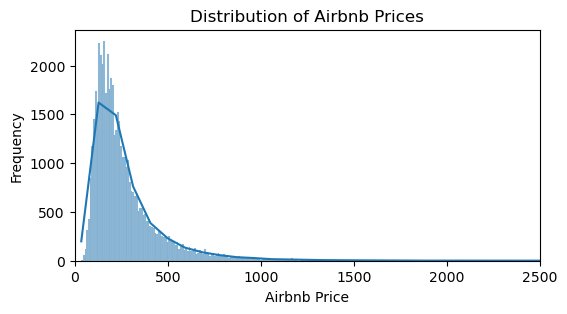

In [18]:
# Histogram: Distribution of Airbnb prices
plt.figure(figsize=(6, 3))
sns.histplot(data=airbnb_data, x='realSum', kde=True)
plt.xlim(0, 2500)  # Set the x-axis limits
plt.xlabel('Airbnb Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Prices')
plt.show()


The histogram provides insights into the distribution of Airbnb prices. We can observe that the prices of Airbnb are always between 0-500€

- To explore the relationships between Airbnb prices and various attributes in our dataset and **identify interesting patterns or findings**, we can utilize data visualization techniques and statistical analysis.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Airbnb prices vs. cleanliness ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_data, x='cleanliness_rating', y='realSum')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Airbnb Price')
plt.title('Relationship between Cleanliness Rating and Airbnb Price')
plt.show()

We can see that Airbnb that are more cleanliness rating, are the most expensive.

In [20]:
# Box plot: Airbnb prices by city
plt.figure(figsize=(8, 6))
sns.boxplot(data=airbnb_data, x='city', y='realSum')
plt.xlabel('City')
plt.ylabel('Airbnb Price')
plt.title('Distribution of Airbnb Prices by City')
plt.show()

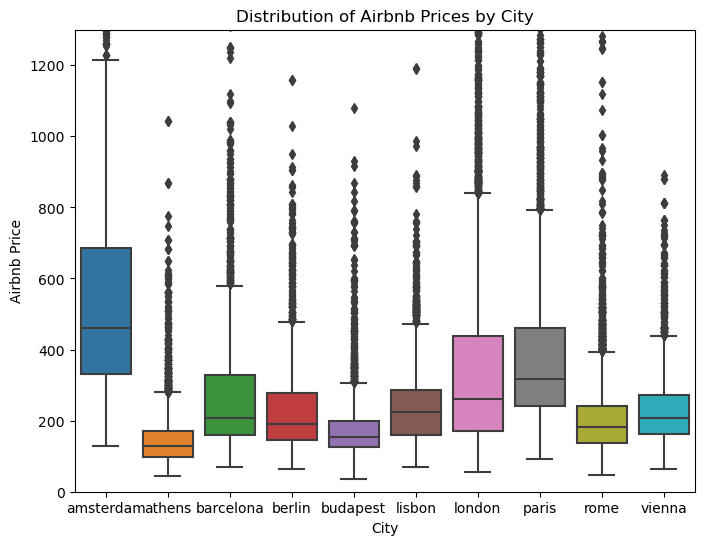

In [21]:
# Box plot: Airbnb prices by city
plt.figure(figsize=(8, 6))
sns.boxplot(data=airbnb_data, x='city', y='realSum')
plt.ylim(0, 1300)
plt.xlabel('City')
plt.ylabel('Airbnb Price')
plt.title('Distribution of Airbnb Prices by City')
plt.show()

This box plot shows the distribution of Airbnb prices by city. We can see that the mean price is between 200/300€

- We can also **identify outliers** using statistical techniques. In this case, outliers are identified as listings with prices above the 95th percentile.

In [22]:
# Identify outliers
outliers = airbnb_data[airbnb_data['realSum'] > airbnb_data['realSum'].quantile(0.95)]

In [23]:
# Plotting outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(data=airbnb_data, x='cleanliness_rating', y='realSum')
sns.scatterplot(data=outliers, x='cleanliness_rating', y='realSum', color='red', marker='X')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Airbnb Price')
plt.title('Identification of Outliers')
plt.legend(['Data', 'Outliers'])
plt.show()

In [24]:
# Box plot: Airbnb prices by city
plt.figure(figsize=(8, 6))
sns.scatterplot(data=outliers, x='city', y='realSum', color='red', marker='X', zorder=10)
sns.boxplot(data=airbnb_data, x='city', y='realSum')
plt.ylim(0, 1300)
plt.xlabel('City')
plt.ylabel('Airbnb Price')
plt.title('Distribution of Airbnb Prices by City')
plt.show()

- We calculate the **correlation matrix**, which provides insights into the relationships between variables. It helps us determine if there are any strong correlations between Airbnb prices and other attributes.

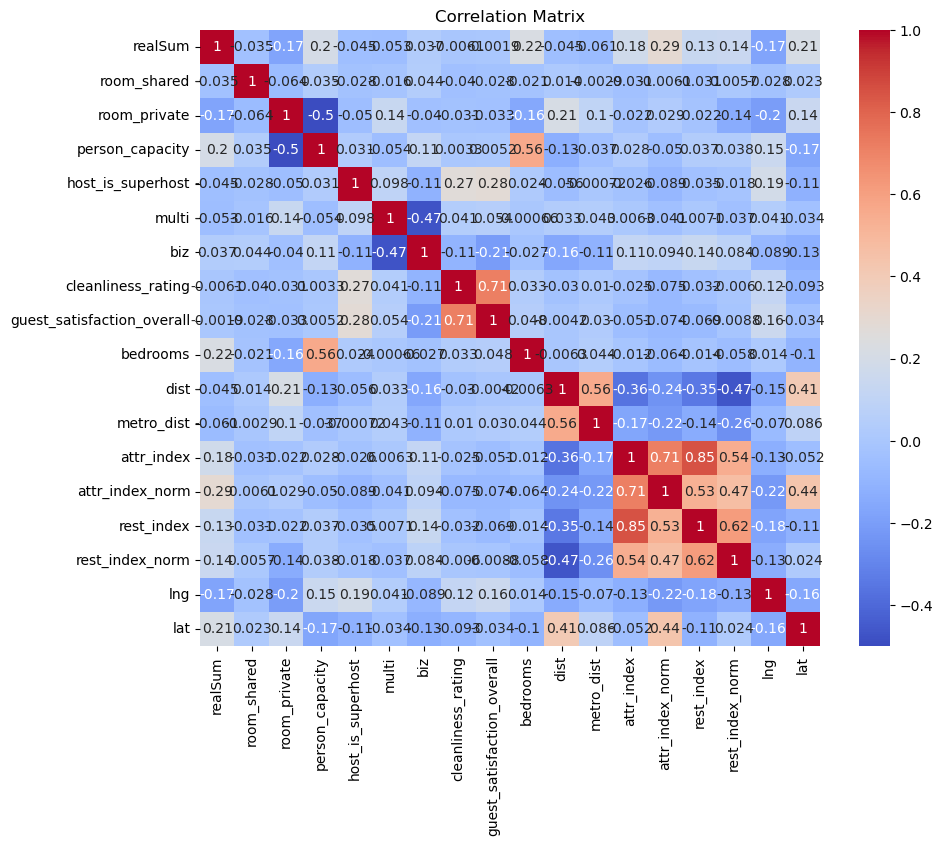

In [25]:
# Calculate correlations
correlations = airbnb_data.corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We calculate and plot the correlation matrix using a heatmap. The heatmap showcases the strength and direction of correlations between different variables. Higher positive values are represented by warmer colors (e.g., red), while higher negative values are represented by cooler colors (e.g., blue). 

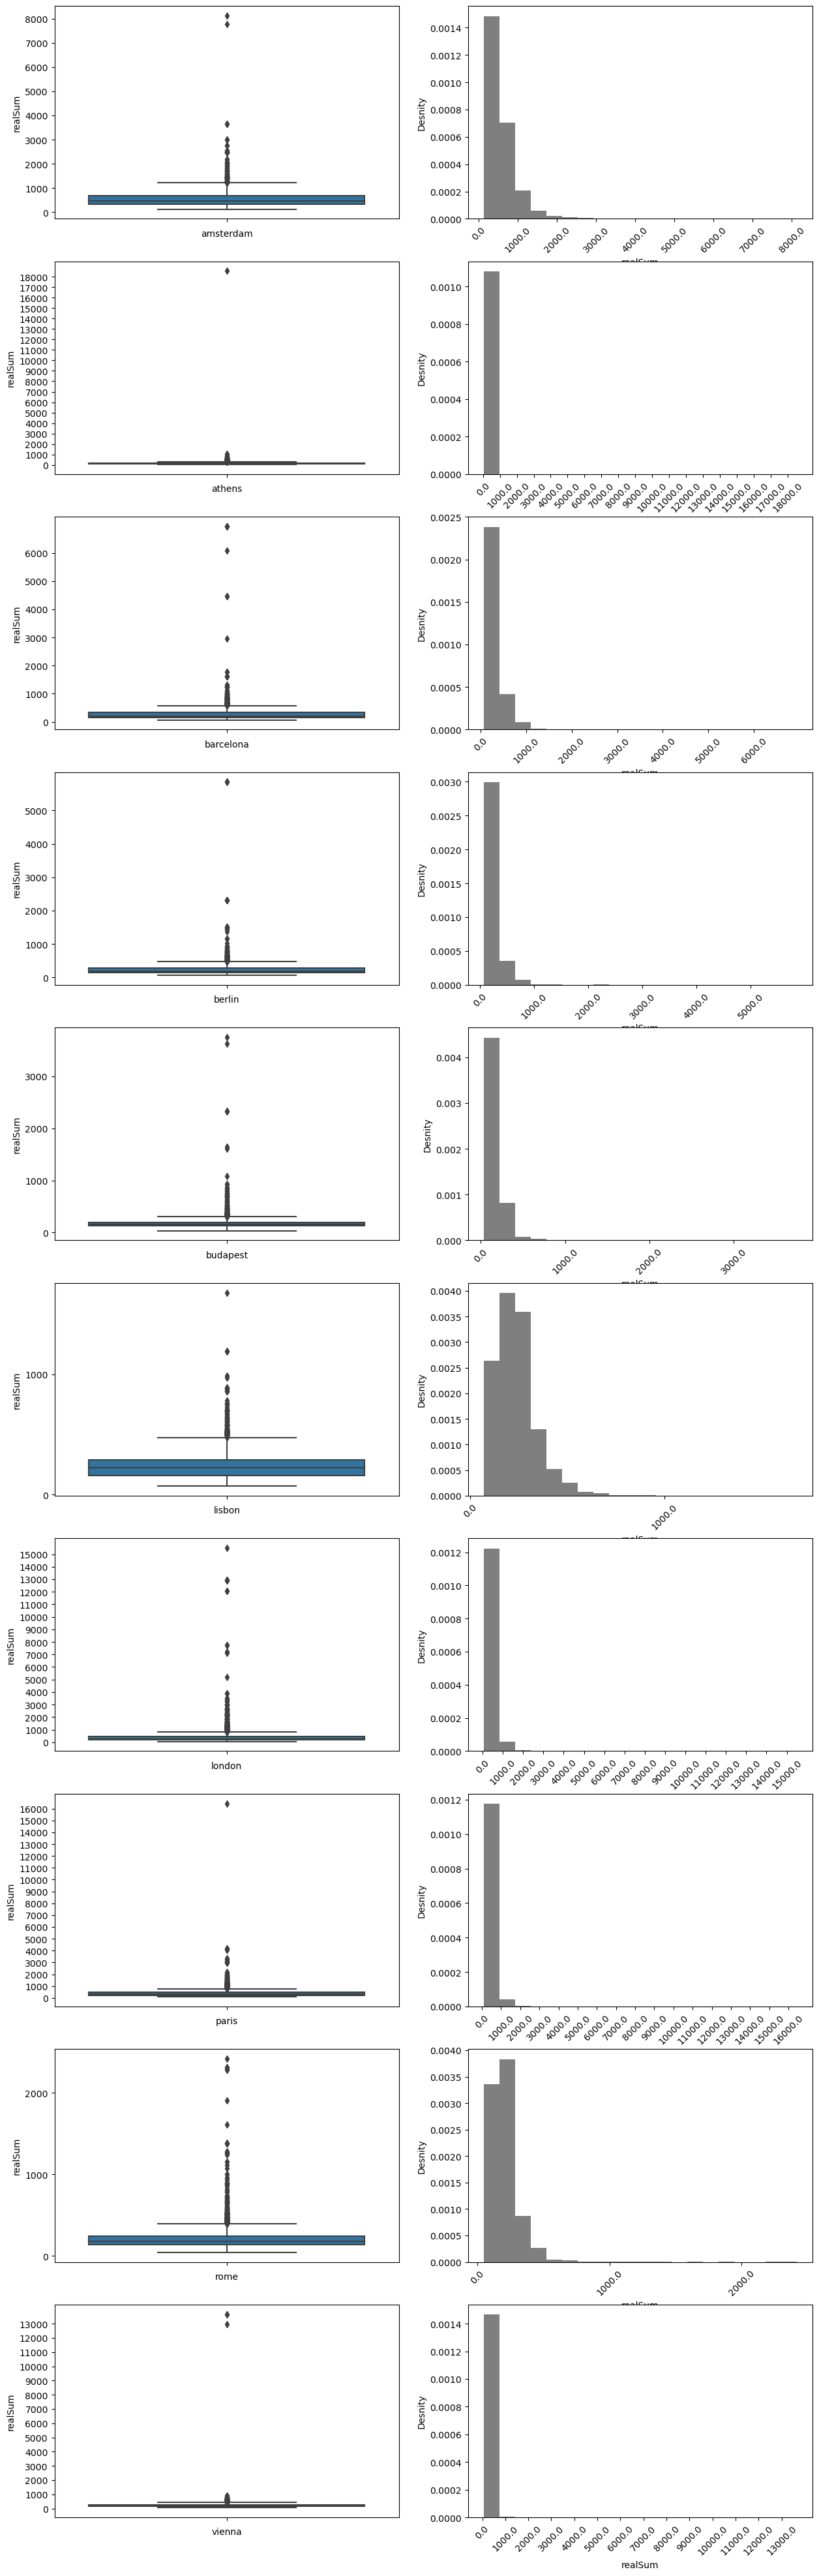

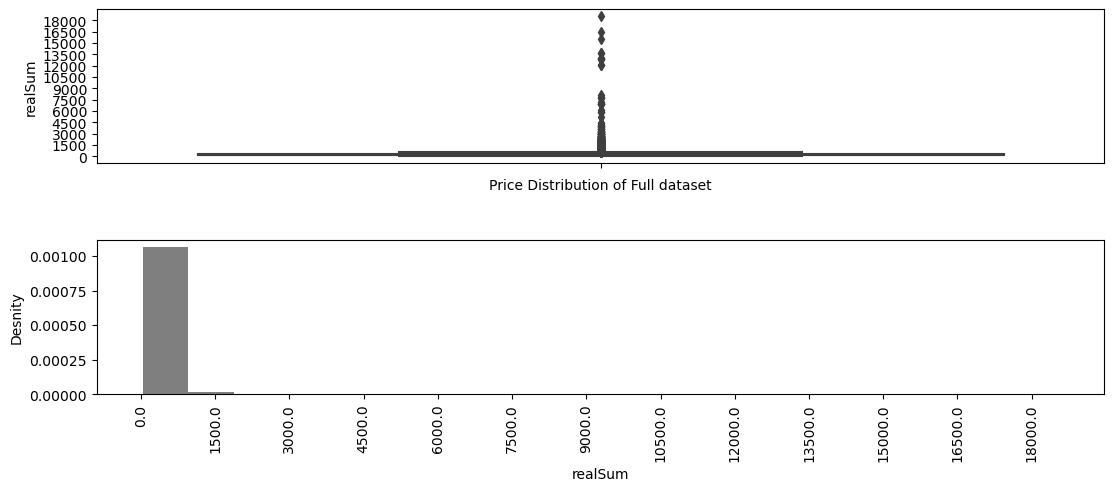

In [26]:
import warnings
warnings.filterwarnings('ignore')

def plotter_1(city,row):
    sns.boxplot(y='realSum', data=city, ax=axs[row,0])
    axs[row,0].set_yticks(np.arange(0,max(city['realSum']),1000))
    axs[row,0].set_xlabel(cities_names[row])
    axs[row,0].set_ylabel('realSum')
    
    axs[row,1].hist(city['realSum'], bins=20, alpha=0.5, color='000000', density=True)
    axs[row,1].set_xticklabels(np.arange(0,max(city['realSum']),1000),rotation=45)
    axs[row,1].set_xticks(np.arange(0,max(city['realSum']),1000),rotation=45)
    axs[row,1].set_xlabel('realSum')
    axs[row,1].set_ylabel('Desnity')

plt.figure
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
fig2, axs2 = plt.subplots(nrows=2, ncols=1, figsize=(13, 5))

sns.boxplot(y='realSum', data=airbnb_data, ax=axs2[0])
axs2[0].set_yticks(np.arange(0,max(airbnb_data['realSum']),1500))
axs2[0].set_xlabel('Price Distribution of Full dataset')
axs2[0].set_ylabel('realSum')

axs2[1].hist(airbnb_data['realSum'], bins=20, alpha=0.5, color='000000', density=True)
axs2[1].set_xticklabels(np.arange(0,max(airbnb_data['realSum']),1500),rotation=90)
axs2[1].set_xticks(np.arange(0,max(airbnb_data['realSum']),1500),rotation=90)
axs2[1].set_xlabel('realSum')
axs2[1].set_ylabel('Desnity')

row = 0
for city in cities:
    plotter_1(city,row)
    row = row + 1
row = 0
    
plt.subplots_adjust(hspace=0.50)
plt.show()

we can see that there are a lot of outliers in the data, let's make a copy of the above dataset and remove the outliers from them. We are creating new copy and will not be making changes to the original dataset so that we can analyze and play with the original dataset if we need to later.

In [27]:
cities_2 = [amsterdam[amsterdam['realSum'] < 2000], athens[athens['realSum'] < 500], barcelona[barcelona['realSum'] < 1000], berlin[berlin['realSum'] < 800], budapest[budapest['realSum'] < 550], lisbon[lisbon['realSum'] < 650], london[london['realSum'] < 1500], paris[paris['realSum'] < 1200], rome[rome['realSum'] < 550], vienna[vienna['realSum'] < 750]]

In [28]:
airbnb_data_2 = pd.concat(cities_2, ignore_index=True)

In [29]:
airbnb_data_2.describe()

realSum  person_capacity         multi           biz  \
count  51176.000000     51176.000000  51176.000000  51176.000000   
mean     263.785977         3.145869      0.291562      0.349637   
std      181.924134         1.288028      0.454486      0.476860   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.405632         2.000000      0.000000      0.000000   
50%      208.911031         3.000000      0.000000      0.000000   
75%      313.036525         4.000000      1.000000      1.000000   
max     1997.515994         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall      bedrooms  \
count        51176.000000                51176.000000  51176.000000   
mean             9.388698                   92.606065      1.149328   
std              0.955359                    8.946068      0.617112   
min              2.000000                   20.000000      0.000000   
25%              9.000000                   90.000000      1.000000   
50%             10.000000                   95.000000      1.000000   
75%             10.000000                   98.000000      1.000000   
max             10.000000                  100.000000     10.000000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51176.000000  51176.000000  51176.000000     51176.000000   
mean       3.198368      0.683459    292.396435        13.340328   
std        2.397423      0.861179    222.671168         9.692772   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.455985      0.248913    136.072325         6.354334   
50%        2.621214      0.413968    233.259410        11.417817   
75%        4.269726      0.739540    383.608836        17.341402   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51176.000000     51176.000000  51176.000000  51176.000000  
mean     623.876219        22.688302      7.427604     45.665365  
std      495.464940        17.756666      9.807457      5.250456  
min       19.576924         0.592757     -9.226340     37.953000  
25%      249.825898         8.716792     -0.072500     41.399160  
50%      520.379828        17.463615      4.873450     47.506630  
75%      829.794258        32.801151     13.537420     51.471185  
max     6696.156772       100.000000     23.786020     52.641410

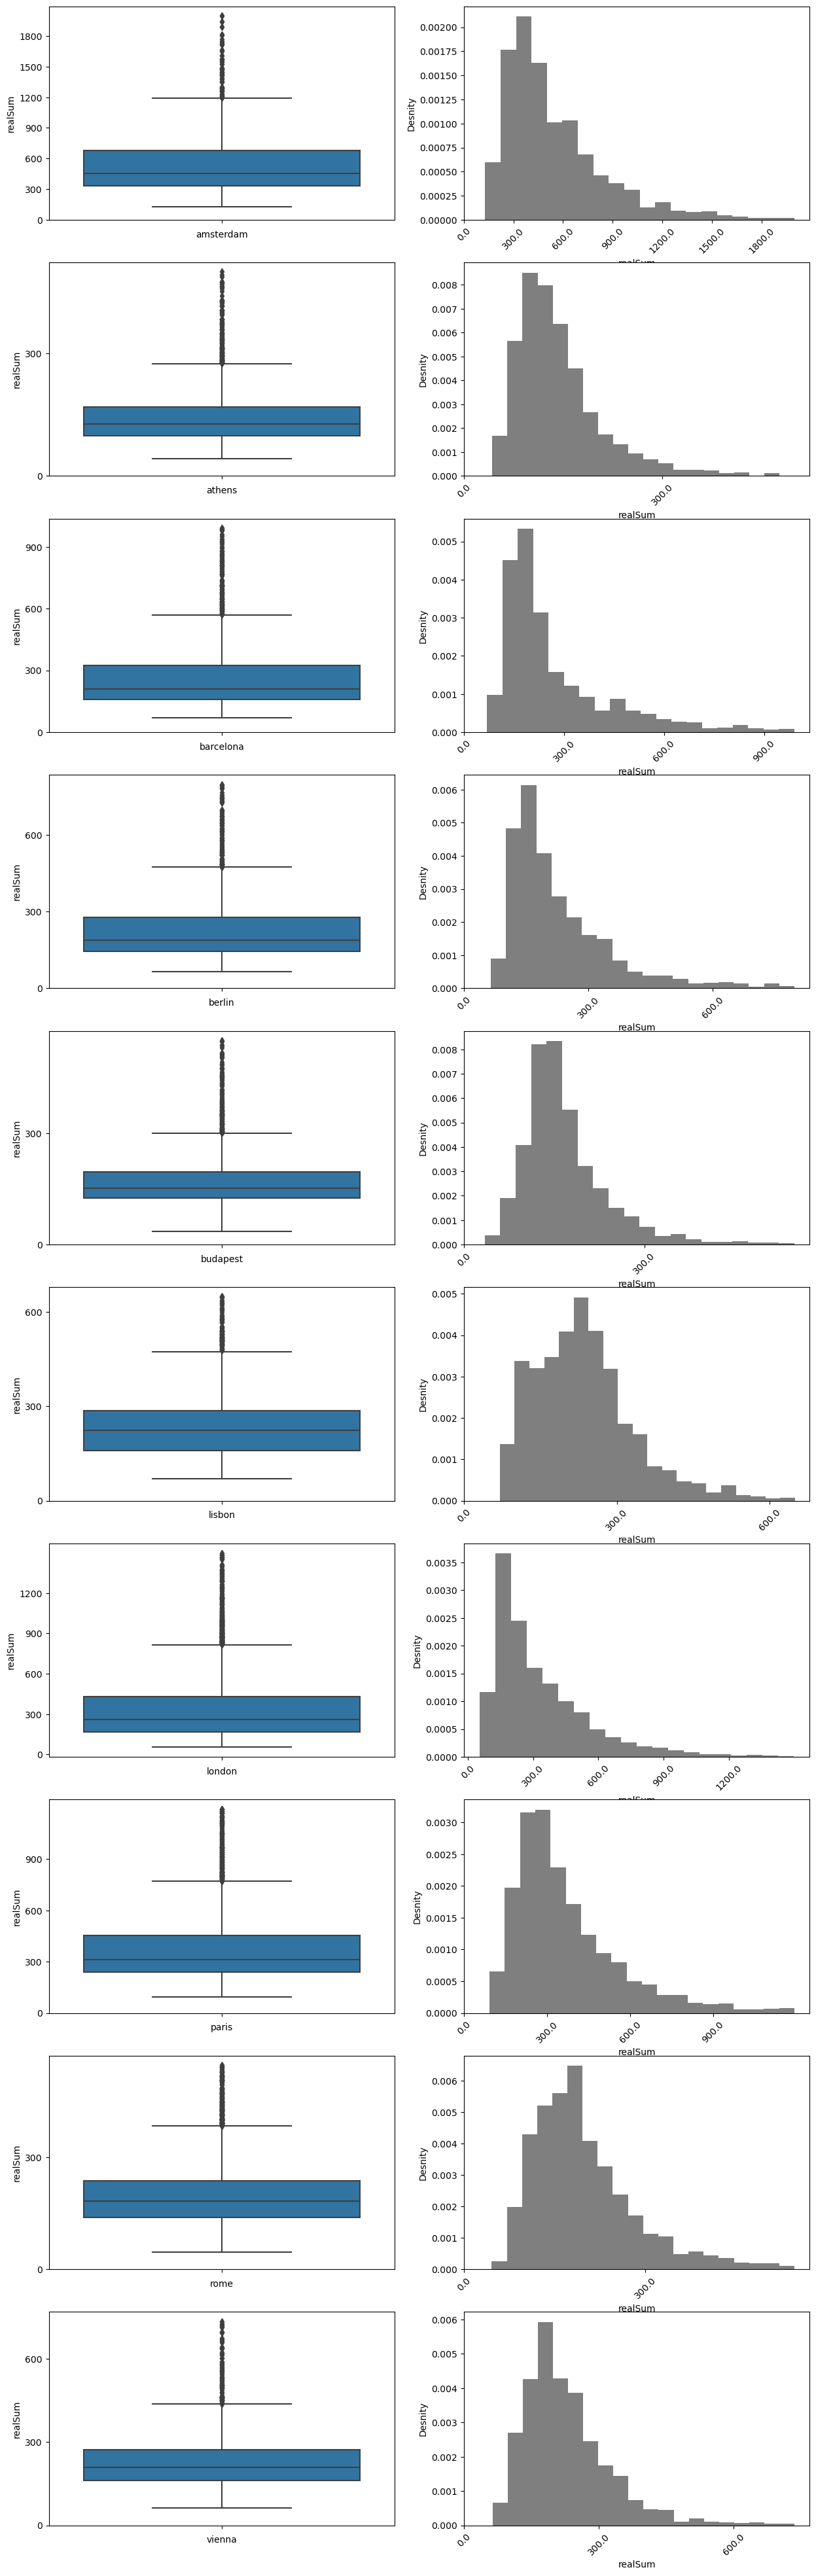

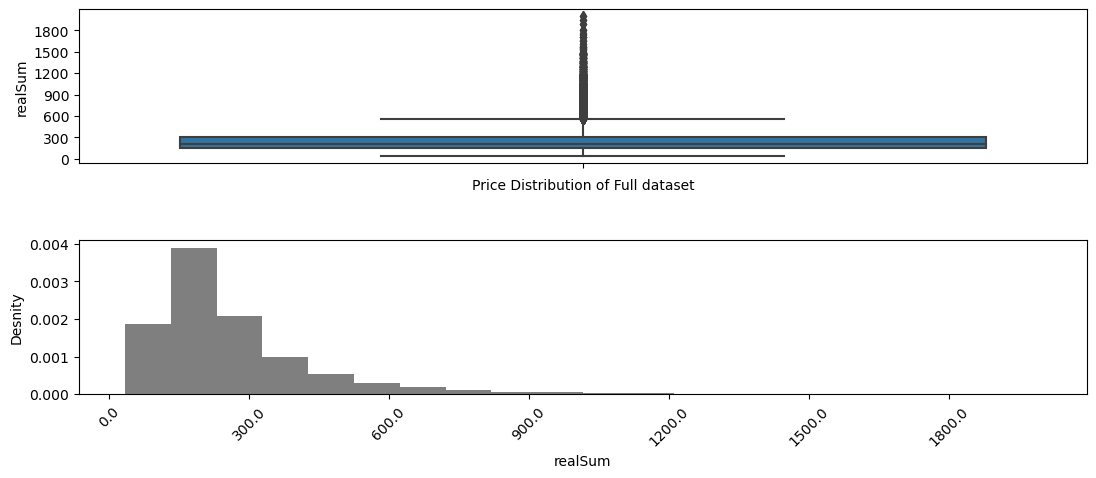

In [30]:
warnings.filterwarnings('ignore')

def plotter_2(city,row):
    sns.boxplot(y='realSum', data=city, ax=axs[row,0])
    axs[row,0].set_yticks(np.arange(0,max(city['realSum']),300))
    axs[row,0].set_xlabel(cities_names[row])
    axs[row,0].set_ylabel('realSum')
    
    axs[row,1].hist(city['realSum'], bins=20, alpha=0.5, color='#000000', density=True)
    axs[row,1].set_xticklabels(np.arange(0,max(city['realSum']),300),rotation=45)
    axs[row,1].set_xticks(np.arange(0,max(city['realSum']),300),rotation=45)
    axs[row,1].set_xlabel('realSum')
    axs[row,1].set_ylabel('Desnity')
    
plt.figure
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 50))
fig2, axs2 = plt.subplots(nrows=2, ncols=1, figsize=(13, 5))
row = 0
for city in cities_2:
    plotter_2(city,row)
    row = row + 1
row = 0

sns.boxplot(y='realSum', data=airbnb_data_2, ax=axs2[0])
axs2[0].set_yticks(np.arange(0,max(airbnb_data_2['realSum']),300))
axs2[0].set_xlabel('Price Distribution of Full dataset')
axs2[0].set_ylabel('realSum')

axs2[1].hist(airbnb_data_2['realSum'], bins=20, alpha=0.5, color='000000', density=True)
axs2[1].set_xticklabels(np.arange(0,max(airbnb_data_2['realSum']),300),rotation=45)
axs2[1].set_xticks(np.arange(0,max(airbnb_data_2['realSum']),300),rotation=45)
axs2[1].set_xlabel('realSum')
axs2[1].set_ylabel('Desnity')
    
plt.subplots_adjust(hspace=0.50)
plt.show()

**AFFECT OF TIME OF THE WEEK ON PRICES**

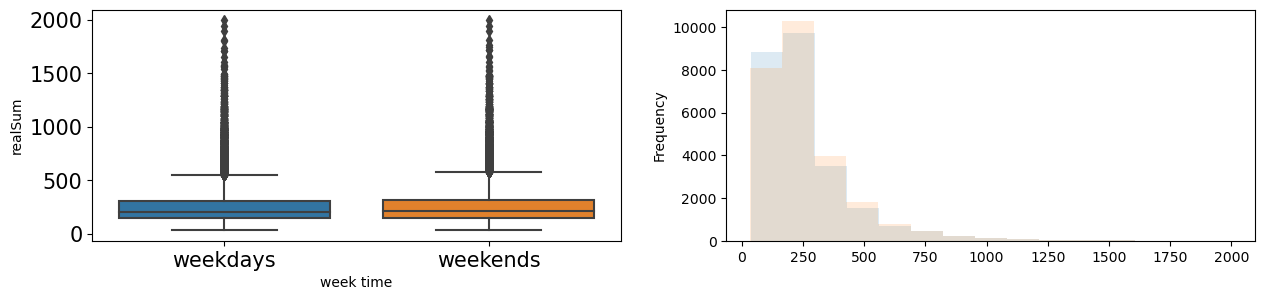

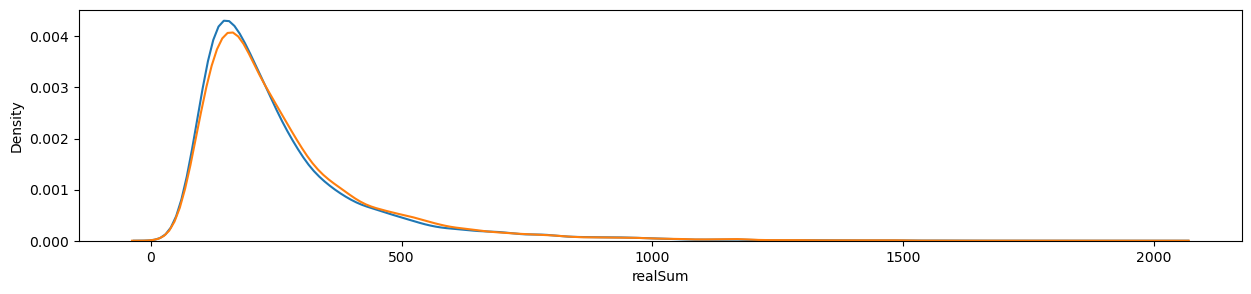

In [31]:
plt.figure
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
sns.boxplot(y='realSum', data=airbnb_data_2,x='week time',ax = axs[0])
axs[0].tick_params(axis='y', labelsize=15)
axs[0].tick_params(axis='x', labelsize=15)

airbnb_data_2.groupby('week time')['realSum'].plot(kind='hist', alpha=0.15, bins=15,ax=axs[1])

sns.kdeplot(data=airbnb_data_2[airbnb_data_2['week time'] == 'weekdays']['realSum'], label='weekdays',ax=axs2)
sns.kdeplot(data=airbnb_data_2[airbnb_data_2['week time'] == 'weekends']['realSum'], label='weekends',ax=axs2)
plt.subplots_adjust(hspace=0.65)
plt.show()

there is almost no difference between the ranges and distribution of realSum on weekends and weekdays

## Phase 2: Midterm solution

### a. Description of your implementation

We have performed various feature engineering techniques, comparative analysis, and statistical methods on our dataset. 

A summary of what we have done is:

**Feature Engineering:**

- We replace boolean values (True/False) with numerical values (1/0).

- We converte categorical values to dummy variables.

- We apply feature scaling using MinMaxScaler and StandardScaler.

**Comparative Analysis:**

- We conducte feature correlation analysis to understand the relationships between variables.

- We analyze the distribution of prices by city to gain insights into pricing patterns.

**Statistical Methods:**

- We apply spatial analysis techniques, specifically spatial clustering, using K-means clustering from scikit-learn. We performe clustering using different sets of variables: "lng" and "lat" with "realSum", "dist" with "realSum", and "metro_dist" with "realSum".

- We utilize time series analysis techniques such as ARIMA (AutoRegressive Integrated Moving Average) using the statsmodels library. And we performe time series regression using OLS (Ordinary Least Squares) regression from the statsmodels library.

These steps demonstrate a comprehensive approach to analyzing our dataset, including exploring spatial patterns and relationships as well as time series analysis for forecasting and regression

### b. Preliminary results from the algorithm based on proposed performance metrics.

We evaluate the performance of the algorithms we used, and we have considered the following performance metrics based on the specific algorithms: 

(WE EXPLAIN THE RESULTS WITHIN EACH SECTION)

**K-means Clustering:**

- **Inertia or Sum of Squared Errors (SSE):** Lower values indicate better clustering.

- **Silhouette Score:** Ranges from -1 to 1, where values closer to 1 indicate better-defined clusters.

- **Calinski-Harabasz Index or Variance Ratio Criterion:** Higher values indicate better-defined clusters.

**ARIMA:**

- **Mean Absolute Error (MAE):** We measure the average absolute difference between the predicted and actual values. Lower values indicate better accuracy.

- **Root Mean Square Error (RMSE):** Similar to MAE but penalizes larger errors more. Lower values indicate better accuracy.

- **ACF/PACF plots:** To analyze the residuals and ensure no patterns or autocorrelations are left in the data.

**OLS Regression:**

- **R-squared:** We measure the proportion of variance in the dependent variable explained by the independent variables. Higher values indicate a better fit.

- **Adjusted R-squared:** Similar to R-squared but accounts for the number of predictors.

- **Coefficient p-values:** We evaluate the significance of each coefficient. Lower p-values indicate stronger relationships.

- **Residual Analysis:** We check for heteroscedasticity, normality of residuals, and absence of multicollinearity.

### c. Experiment analysis. Based on results from your experiments so far, explain what worked and what didn’t (what tweaks you made and its effect).

Based on the experiments conducted so far, **the K-means clustering algorithm** has been successful in creating meaningful clusters based on the spatial features and prices of the Airbnb data. This technique has provided insights into different segments or groups within the data. Instead, **Spatial interpolation using Inverse Distance Weighting (IDW) with PyKrige and Hotspot analysis using Getis-Ord Gi* with GeoPandas** did not work due to memory allocation issues. It seems that the size or complexity of the dataset exceeded the available memory, resulting in errors and the need to restart the notebook. This limitation prevented the successful application of these spatial analysis techniques.

On the other hand, **ARIMA modeling** and **time series regression with OLS** have been effective in forecasting future rental rates and analyzing the temporal patterns in the data. These techniques have provided accurate predictions and valuable insights into the temporal dynamics of the Airbnb prices.

Unfortunately, the attempted **spatial econometrics methods** were not successful due to the same memory allocation issue encountered with spatial interpolation and hotspot analysis.

## 3. Feature Engineering

In [32]:
airbnb_data_2

realSum        room_type  room_shared  room_private  \
0      194.033698     Private room        False          True   
1      344.245776     Private room        False          True   
2      264.101422     Private room        False          True   
3      433.529398     Private room        False          True   
4      485.552926     Private room        False          True   
...           ...              ...          ...           ...   
51171  715.938574  Entire home/apt        False         False   
51172  304.793960  Entire home/apt        False         False   
51173  637.168969  Entire home/apt        False         False   
51174  301.054157     Private room        False          True   
51175  133.230489     Private room        False          True   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                  2.0              False      1    0                10.0   
1                  4.0              False      0    0                 8.0   
2                  2.0              False      0    1                 9.0   
3                  4.0              False      0    1                 9.0   
4                  2.0               True      0    0                10.0   
...                ...                ...    ...  ...                 ...   
51171              6.0              False      0    1                10.0   
51172              2.0              False      0    0                 8.0   
51173              2.0              False      0    0                10.0   
51174              2.0              False      0    0                10.0   
51175              4.0               True      1    0                10.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                            93.0  ...  5.022964    2.539380   78.690379   
1                            85.0  ...  0.488389    0.239404  631.176378   
2                            87.0  ...  5.748312    3.651621   75.275877   
3                            90.0  ...  0.384862    0.439876  493.272534   
4                            98.0  ...  0.544738    0.318693  552.830324   
...                           ...  ...       ...         ...         ...   
51171                       100.0  ...  0.530181    0.135447  219.402478   
51172                        86.0  ...  0.810205    0.100839  204.970121   
51173                        93.0  ...  0.994051    0.202539  169.073402   
51174                        87.0  ...  3.044100    0.287435  109.236574   
51175                        93.0  ...  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
0             4.166708   98.253896         6.846473   4.90569  52.41772   
1            33.421209  837.280757        58.342928   4.90005  52.37432   
2             3.985908   95.386955         6.646700   4.97512  52.36103   
3            26.119108  875.033098        60.973565   4.89417  52.37663   
4            29.272733  815.305740        56.811677   4.90051  52.37508   
...                ...         ...              ...       ...       ...   
51171        15.712158  438.756874        10.604584  16.37940  48.21136   
51172        14.678608  342.182813         8.270427  16.38070  48.20296   
51173        12.107921  282.296424         6.822996  16.38568  48.20460   
51174         7.822803  158.563398         3.832416  16.34100  48.19200   
51175        10.774264  225.247293         5.444140  16.39066  48.20811   

       week time       city  
0       weekdays  amsterdam  
1       weekdays  amsterdam  
2       weekdays  amsterdam  
3       weekdays  amsterdam  
4       weekdays  amsterdam  
...          ...        ...  
51171   weekends     vienna  
51172   weekends     vienna  
51173   weekends     vienna  
51174   weekends     vienna  
51175   weekends     vienna  

[51176 rows x 21 columns]

**REPLACE TRUE/FALSE BOOLEAN WITH 1/0**

In [33]:
airbnb_data_2.replace({False: 0, True: 1},inplace=True)
airbnb_data_2.head()

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1              2.0   
1  344.245776  Private room            0             1              4.0   
2  264.101422  Private room            0             1              2.0   
3  433.529398  Private room            0             1              4.0   
4  485.552926  Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                10.0   
1                  0      0    0                 8.0   
2                  0      0    1                 9.0   
3                  0      0    1                 9.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  week time  \
0         4.166708   98.253896         6.846473  4.90569  52.41772   weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432   weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103   weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663   weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508   weekdays   

        city  
0  amsterdam  
1  amsterdam  
2  amsterdam  
3  amsterdam  
4  amsterdam  

[5 rows x 21 columns]

We've converted True/False of features to 1/0

**REPLACE CATEGORICAL VALUES TO DUMMY VARIABLES**

We convert categorical features into dummy variables for several reasons:

**1. Numeric Representation:** Machine learning algorithms generally require numerical input data. By converting categorical features into dummy variables, a unique numerical value is assigned to each category, allowing the algorithms to effectively work with these features.

**2. Removal of Implicit Order:** Encoding categorical features as dummy variables avoids assigning an implicit order to the categories. This is important when the categories do not have an inherent order relationship, and treating them as numeric variables could lead to incorrect results.

**3. Avoiding Biases:** By using dummy variables, the introduction of biases in the model due to the arbitrary assignment of numerical values to the categories is avoided. Each category is represented as an independent binary variable, allowing the model to treat all categories equally.

**4. Increased Flexibility:** Converting categorical features into dummy variables provides greater flexibility in data representation. Each category has its own binary column, allowing for a more precise capture of the specific information of each category and its impact on the outcome.

**5. Improved Model Performance:** By providing an appropriate numeric representation of categorical features, better performance results can be achieved. Machine learning algorithms can leverage the additional information captured in the dummy variables to make more accurate predictions.



In [34]:
print(airbnb_data_2['room_type'].value_counts())
print(airbnb_data_2['week time'].value_counts())
print(airbnb_data_2['city'].value_counts())

Entire home/apt    32182
Private room       18628
Shared room          366
Name: room_type, dtype: int64
weekends    25926
weekdays    25250
Name: week time, dtype: int64
london       9881
rome         8929
paris        6590
lisbon       5727
athens       5231
budapest     3979
vienna       3524
barcelona    2802
berlin       2455
amsterdam    2058
Name: city, dtype: int64


In [35]:
airbnb_data_2_categorical_dummies = pd.get_dummies(airbnb_data_2[['room_type','week time','city']],drop_first=True)
airbnb_data_3 = pd.concat([airbnb_data_2_categorical_dummies, airbnb_data_2.drop(columns=['room_type','week time', 'city'])], axis=1)

In [36]:
airbnb_data_3

room_type_Private room  room_type_Shared room  week time_weekends  \
0                           1                      0                   0   
1                           1                      0                   0   
2                           1                      0                   0   
3                           1                      0                   0   
4                           1                      0                   0   
...                       ...                    ...                 ...   
51171                       0                      0                   1   
51172                       0                      0                   1   
51173                       0                      0                   1   
51174                       1                      0                   1   
51175                       1                      0                   1   

       city_athens  city_barcelona  city_berlin  city_budapest  city_lisbon  \
0                0               0            0              0            0   
1                0               0            0              0            0   
2                0               0            0              0            0   
3                0               0            0              0            0   
4                0               0            0              0            0   
...            ...             ...          ...            ...          ...   
51171            0               0            0              0            0   
51172            0               0            0              0            0   
51173            0               0            0              0            0   
51174            0               0            0              0            0   
51175            0               0            0              0            0   

       city_london  city_paris  ...  guest_satisfaction_overall  bedrooms  \
0                0           0  ...                        93.0         1   
1                0           0  ...                        85.0         1   
2                0           0  ...                        87.0         1   
3                0           0  ...                        90.0         2   
4                0           0  ...                        98.0         1   
...            ...         ...  ...                         ...       ...   
51171            0           0  ...                       100.0         3   
51172            0           0  ...                        86.0         1   
51173            0           0  ...                        93.0         1   
51174            0           0  ...                        87.0         1   
51175            0           0  ...                        93.0         1   

           dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0      5.022964    2.539380   78.690379         4.166708   98.253896   
1      0.488389    0.239404  631.176378        33.421209  837.280757   
2      5.748312    3.651621   75.275877         3.985908   95.386955   
3      0.384862    0.439876  493.272534        26.119108  875.033098   
4      0.544738    0.318693  552.830324        29.272733  815.305740   
...         ...         ...         ...              ...         ...   
51171  0.530181    0.135447  219.402478        15.712158  438.756874   
51172  0.810205    0.100839  204.970121        14.678608  342.182813   
51173  0.994051    0.202539  169.073402        12.107921  282.296424   
51174  3.044100    0.287435  109.236574         7.822803  158.563398   
51175  1.263932    0.480903  150.450381        10.774264  225.247293   

       rest_index_norm       lng       lat  
0             6.846473   4.90569  52.41772  
1            58.342928   4.90005  52.37432  
2             6.646700   4.97512  52.36103  
3            60.973565   4.89417  52.37663  
4            56.811677   4.90051  52.37508  
...                ...       ...       ...  
51171        10.604584  16.37940  48.211

**SCALING THE FEATURES**

We use MinMaxScaler and StandardScaler for feature normalization, scale differences elimination, and improved performance and interpretation of machine learning models for several reasons:

**1. Feature Normalization:** Both scalers allow for the normalization of input features, which involves scaling the values to a specific range. This is useful when the features have different scales and initial ranges, which could impact the performance of machine learning algorithms. Normalization ensures that all features have the same relative importance and eliminates any disproportionate influence due to scale differences.

**2. MinMaxScaler:** MinMaxScaler transforms the data to fit within a specific range, typically between 0 and 1. This is useful when a specific scale is required for the features, and it is desired to preserve the original data distribution. MinMaxScaler is especially useful in algorithms sensitive to relative differences in feature values, such as those based on distances or similarity measures.

**3. StandardScaler:** StandardScaler standardizes the features by scaling them to have a mean of zero and a standard deviation of one. This approach assumes that the features follow a Gaussian distribution. StandardScaler is useful when it is desired to remove the mean and variance of the features, which can be beneficial for certain algorithms that assume a normal distribution of the data or perform better with standardized features.

**4. Preservation of Distribution Shape:** Both MinMaxScaler and StandardScaler preserve the shape of the original data distribution while scaling it. This is important when the shape and statistical properties of the data are relevant for analysis. By preserving the distribution, distortion of the features is avoided, and statistical information is retained.

**5. Improved Model Performance:** By using scalers to normalize the features, the performance of machine learning models can be enhanced. Normalization facilitates the convergence of optimization algorithms and improves the interpretation of coefficients in linear models. It can also help reduce the influence of outliers or biases in the data.



In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create an instance of StandardScaler
std_scaler = StandardScaler()
# Create an instance of MinMaxScaler
minmax_scaler = MinMaxScaler()


In [38]:
features_to_scale = ['person_capacity','cleanliness_rating','guest_satisfaction_overall','bedrooms','dist','metro_dist','attr_index','rest_index','lng','lat']
features_not_to_scale = ['room_type_Private room', 'room_type_Shared room', 'week time_weekends','city_athens', 
                         'city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 
                         'city_rome', 'city_vienna','realSum','host_is_superhost', 'multi', 'biz']

In [39]:
std_scaled_features = pd.DataFrame(std_scaler.fit_transform(airbnb_data_3[features_to_scale]), columns=features_to_scale)
minmax_scaled_features = pd.DataFrame(minmax_scaler.fit_transform(airbnb_data_3[features_to_scale]), columns=features_to_scale)

In [40]:
airbnb_final_std = pd.concat([std_scaled_features.reset_index(drop=True),  airbnb_data_3[features_not_to_scale].reset_index(drop=True)], axis=1)
airbnb_final_minmax =   pd.concat([minmax_scaled_features.reset_index(drop=True),  airbnb_data_3[features_not_to_scale].reset_index(drop=True)], axis=1)

In [41]:
airbnb_final_std

person_capacity  cleanliness_rating  guest_satisfaction_overall  \
0            -0.889640            0.639872                    0.044035   
1             0.663137           -1.453601                   -0.850222   
2            -0.889640           -0.406864                   -0.626657   
3             0.663137           -0.406864                   -0.291311   
4            -0.889640            0.639872                    0.602945   
...                ...                 ...                         ...   
51171         2.215914            0.639872                    0.826509   
51172        -0.889640           -1.453601                   -0.738439   
51173        -0.889640            0.639872                    0.044035   
51174        -0.889640            0.639872                   -0.626657   
51175         0.663137            0.639872                    0.044035   

       bedrooms      dist  metro_dist  attr_index  rest_index       lng  \
0     -0.241981  0.761073    2.155114   -0.959748   -1.060877 -0.257145   
1     -0.241981 -1.130383   -0.515641    1.521451    0.430720 -0.257720   
2     -0.241981  1.063629    3.446659   -0.975082   -1.066664 -0.250066   
3      1.378486 -1.173566   -0.282851    0.902129    0.506916 -0.258320   
4     -0.241981 -1.106878   -0.423570    1.169601    0.386367 -0.257673   
...         ...       ...         ...         ...         ...       ...   
51171  2.998953 -1.112951   -0.636357   -0.327814   -0.373631  0.912763   
51172 -0.241981 -0.996147   -0.676544   -0.392629   -0.568549  0.912896   
51173 -0.241981 -0.919462   -0.558449   -0.553840   -0.689419  0.913403   
51174 -0.241981 -0.064348   -0.459867   -0.822566   -0.939153  0.908848   
51175 -0.241981 -0.806889   -0.235211   -0.637476   -0.804563  0.913911   

            lat  ...  city_budapest  city_lisbon  city_london  city_paris  \
0      1.286064  ...              0            0            0           0   
1      1.277798  ...              0            0            0           0   
2      1.275267  ...              0            0            0           0   
3      1.278238  ...              0            0            0           0   
4      1.277942  ...              0            0            0           0   
...         ...  ...            ...          ...          ...         ...   
51171  0.484914  ...              0            0            0           0   
51172  0.483314  ...              0            0            0           0   
51173  0.483627  ...              0            0            0           0   
51174  0.481227  ...              0            0            0           0   
51175  0.484295  ...              0            0            0           0   

       city_rome  city_vienna     realSum  host_is_superhost  multi  biz  
0              0            0  194.033698                  0      1    0  
1              0            0  344.245776                  0      0    0  
2              0            0  264.101422                  0      0    1  
3              0            0  433.529398                  0      0    1  
4              0            0  485.552926                  1      0    0  
...          ...          ...         ...                ...    ...  ...  
51171          0            1  715.938574                  0      0    1  
51172          0            1  304.793960                  0      0    0  
51173          0            1  637.168969                  0      0    0  
51174          0            1  301.054157                  0      0    0  
51175          0            1  133.230489                  1      1    0  

[51176 rows x 26 columns]

In [42]:
print(airbnb_final_std.shape)
print(airbnb_final_minmax.shape)

(51176, 26)
(51176, 26)


## 4. Comparative Analysis

**4.1. Feature Correlation** 

We can compute the correlation matrix between standardized features and prices using the Pandas corr() function. This will allow us to identify linear relationships between features and prices. We can visualize the correlation matrix using a heat map.


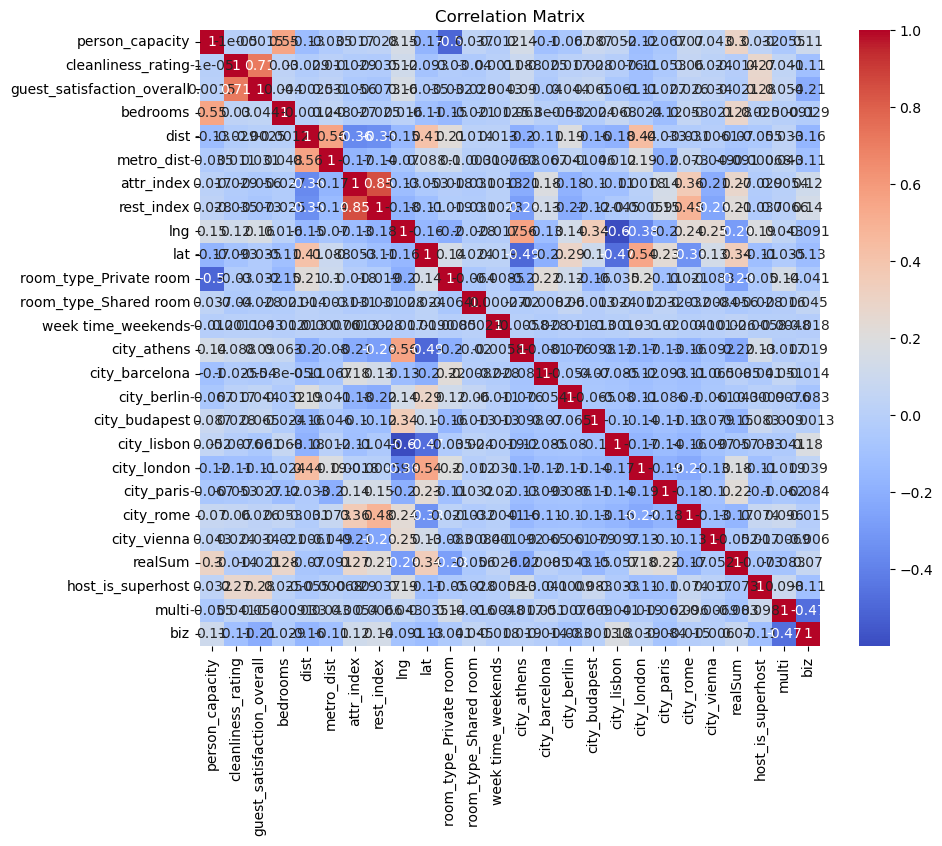

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = airbnb_final_std.corr()

# Visualize the correlation matrix with a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In the correlation matrix, most of the features show low correlation with each other, except for "cleanliness_rating", "guest_satisfaction_overall", and "bedrooms" which exhibit a higher correlation.

This suggests that the majority of the features in the dataset have little linear relationship with one another. However, "cleanliness_rating", "guest_satisfaction_overall", and "bedrooms" appear to be more strongly correlated, indicating a potential association between these variables.



**4.2. Price distribution analysis by city:** 

We can explore the distribution of Airbnbs prices in different cities in Europe using box plots. This way, we compare prices between cities and detect possible differences.

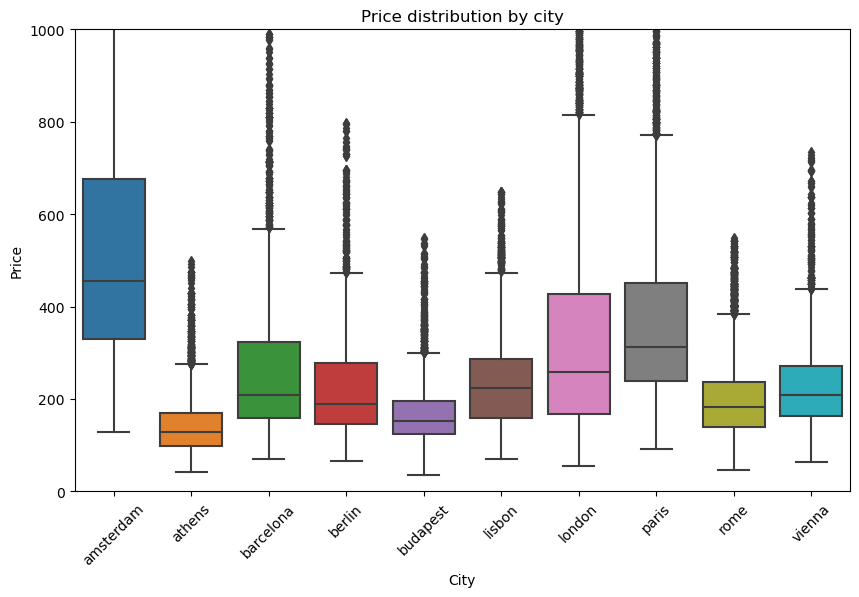

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot of price distribution by city
plt.figure(figsize=(10, 6))
sns.boxplot(x='city', y='realSum', data=airbnb_data_2)
plt.title('Price distribution by city')
plt.xlabel('City')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Establecer el límite en el eje y
plt.xticks(rotation=45)
plt.show()



The graph shows the distribution of Airbnb rental prices in different cities in Europe. Each box represents the price distribution for a specific city.

Looking at the graph, we can make the following observations:

- There are significant variations in prices between cities. Some cities like Amsterdam and Paris tend to have higher prices, while others like Budapest and Athens tend to have lower prices.

- The boxes (boxplots) represent the distribution of prices in each city. The line in the middle of the box represents the median, that is, the value that divides the data in half. The boxes show the interquartile range (IQR), which encompasses the middle 50% of the data. The "whiskers" show the range of data that are not outliers.

- In some cities, such as Amsterdam, London and Paris, there is a greater dispersion in prices, since the mustaches are longer. This indicates that there is greater variability in rental prices in those cities.

## 5. Statistical Methods

**5.1. Spatial Analysis**

**Spatial clustering (K-means clustering using scikit-learn):** this algorithm can be used to identify spatial clusters of similar Airbnb across Europe. It helps in finding regions or cities with comparable pricing patterns.

When we apply the K-means algorithm, we use dataset with standardized features. This is because K-means is based on the Euclidean distance between the samples to assign them to the clusters. If the features have different scales or variances, some features may dominate the Euclidean distance and affect the clustering result.

By standardizing the features, all of them will have mean zero and standard deviation equal to one, which guarantees that all features have the same weight in the distance calculation. This helps to avoid bias in the algorithm and to obtain a more balanced clustering.

First, we use the variables **"lng" = longitude AND "lat" = latitude** to identify spatial clusters: 

In [45]:
from sklearn.cluster import KMeans

#Assuming 'X' contains the spatial features (e.g., longitude and latitude) 
X = airbnb_final_std[['lng', 'lat']]

kmeans = KMeans(n_clusters=3, random_state=0) 

# We apply the algorithm of K-means to the features 
kmeans.fit(X)

# Gets the cluster labels assigned to each sample
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
airbnb_final_std['cluster_label'] = labels

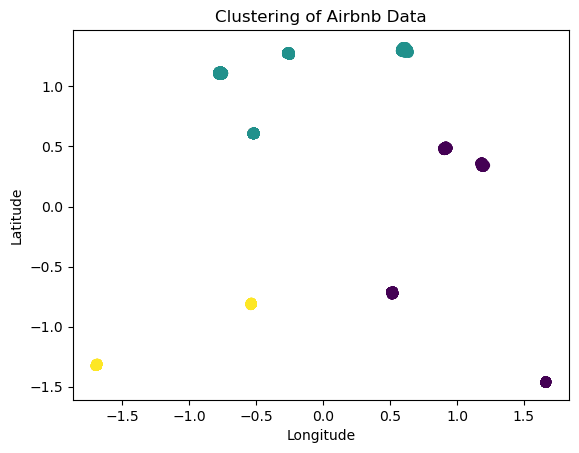

In [46]:
import matplotlib.pyplot as plt
# Scatterplot
plt.scatter(airbnb_final_std['lng'], airbnb_final_std['lat'], c=airbnb_final_std['cluster_label'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Airbnb Data')
# Show the graph
plt.show()

The resulting scatter plot visually represents the spatial distribution of Airbnb listings and shows how they have been grouped into 3 clusters based on their geographical proximity. Each data point's color indicates its cluster membership, allowing us to observe patterns and spatial relationships within the data.

So, we represent the spatial clustering of Airbnb data based on longitude and latitude.
We have followed these steps:

1) The longitude and latitude values are extracted from the airbnb_final_std DataFrame 

2) Each data point (corresponding to an Airbnb listing) is plotted as a point on the scatter plot, where the x-coordinate represents the longitude and the y-coordinate represents the latitude.

3) The color of each data point is determined by the assigned cluster label (cluster_labels) obtained from the K-means clustering algorithm. Each cluster is assigned a different color from the colors list.



**2D Plot with Centroids:** 
We can plot the centroids of each cluster as well. The centroids represent the center points of the clusters.


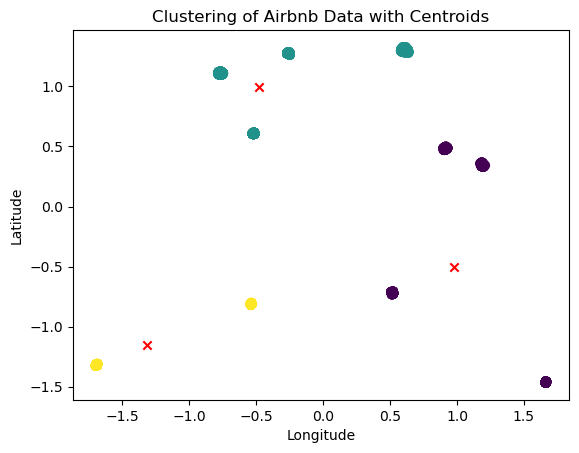

In [47]:
plt.scatter(airbnb_final_std['lng'], airbnb_final_std['lat'], c=airbnb_final_std['cluster_label'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Airbnb Data with Centroids')
plt.show()


Visualizing the clusters with their centroids can provide several advantages for our analysis of predicting Airbnb prices:

- **Cluster Interpretation:** By plotting the centroids along with the data points, we can get a clear visual representation of the cluster centers. This helps in understanding the characteristics and patterns associated with each cluster. We can analyze the distribution and spatial arrangement of the centroids, which can provide insights into the geographic areas or neighborhoods that have similar Airbnb pricing patterns.

- **Feature Analysis:** Examining the location of the centroids can help in identifying regions or areas where the Airbnb prices are relatively higher or lower compared to other areas. This information can be useful in determining the key features or factors that contribute to the price differences. For example, we can identify if certain neighborhoods or proximity to popular attractions impact the prices.

- **Prediction Analysis:** The centroids can also be used as representatives of the clusters for prediction purposes. When we have a new data point or listing, we can assign it to the closest centroid based on its spatial location. This allows us to make predictions or estimate the price range of the new listing based on the cluster it belongs to. By considering the features and characteristics associated with that cluster, we can make more accurate predictions.

**Cluster Boundaries:** Another way to visualize the clusters is by plotting the boundaries that separate different clusters. This can be achieved using Voronoi diagrams.

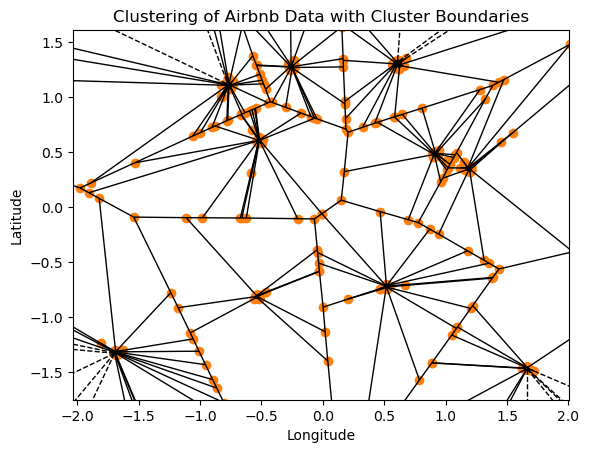

In [48]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.column_stack((airbnb_final_std['lng'], airbnb_final_std['lat']))
vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering of Airbnb Data with Cluster Boundaries')
plt.show()


This visualization technique divides the space based on the spatial distribution of the data points (longitude and latitude in this case) and creates boundaries around each cluster.

- **Data Points:** The individual data points in the graph represent the Airbnb listings in our dataset. Each data point corresponds to a specific location characterized by its longitude and latitude coordinates. These coordinates provide information about the geographical position of each listing.

- **Cluster Boundaries:** The boundaries displayed in the graph are created by the Voronoi diagram. These boundaries divide the space into regions based on proximity to the data points. Each region represents a cluster, and the boundaries indicate the areas where the data points within a cluster are closer to each other compared to other clusters.

- **Cluster Interpretation:** By examining the cluster boundaries, we can identify distinct regions or areas with different pricing patterns. Clusters with similar prices tend to be grouped together within their respective boundaries. This can provide insights into geographical patterns and spatial variations in Airbnb prices.

- **Prediction Analysis:** The Voronoi diagram can also be used for prediction purposes. When we have a new data point (i.e., a new Airbnb listing), we can assign it to the cluster based on its proximity to the cluster boundaries. This allows us to estimate the price range or make predictions for the new listing based on the pricing patterns observed within the corresponding cluster.

We calculate the performance metrics for the K-means clustering algorithm:

**1) Inertia or Sum of Squared Errors (SSE)**

In [49]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 24457.759613626284


**2) Silhouette Score**

In [50]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.6449303730731172


**3) Calinski-Harabasz Index**

In [51]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 81489.10665290829


Based on the metrics obtained for the clustering of Airbnb data using the "lng" and "lat" variables along with the prices of the Airbnb listings ("realSum"), we can interpret the results as follows:

- **Inertia:** The Inertia value of 24457.76 represents the sum of squared distances of all data points to their respective cluster centers. A lower Inertia value indicates better clustering, where data points within each cluster are closer to their centroid. In this case, the relatively low Inertia suggests that the clusters formed using the "lng" and "lat" variables, along with the prices ("realSum"), are relatively compact and well-separated.

- **Silhouette Score:** The Silhouette Score of 0.6449 indicates the overall quality of the clustering. It measures how well each data point fits within its assigned cluster compared to other clusters. A score closer to 1 indicates that the clusters are well-defined and well-separated. The obtained Silhouette Score suggests that the clusters formed using the given variables exhibit good separation and cohesion.

- **Calinski-Harabasz Index:** The Calinski-Harabasz Index value of 81489.11 is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. Higher values of the index indicate better-defined clusters with distinct boundaries. The obtained index suggests that the clusters formed using the "lng" and "lat" variables, along with the prices ("realSum"), have well-separated boundaries and are distinguishable from each other.

Also we can use the variable **"dist" (distance from the city center.** It provides information on the proximity of the accomodation to the central area of the city):

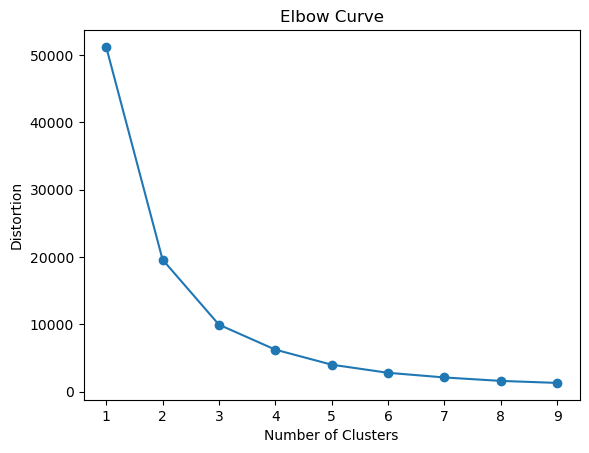

In [52]:
from sklearn.cluster import KMeans

# Extract the 'dist' feature from our dataset
X = airbnb_final_std[['dist']]

# Determine the optimal number of clusters
# We use the elbow method or silhouette analysis
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

# Initialize K-means with the optimal number of clusters
n_clusters = 3  # Adjust this based on the elbow curve or your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Apply K-means clustering to the 'dist' feature
kmeans.fit(X)

# Get the cluster labels assigned to each sample
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
airbnb_final_std['cluster_label'] = labels


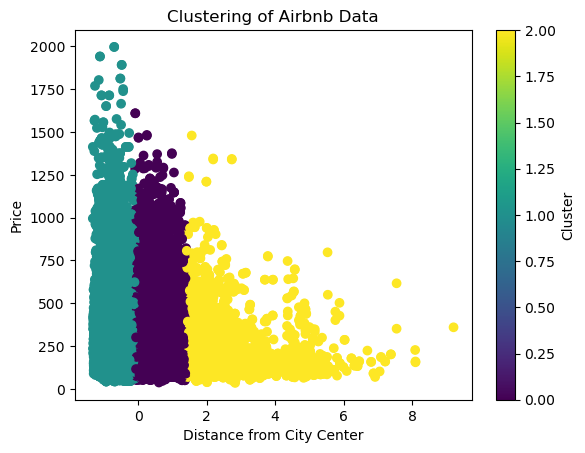

In [53]:
import matplotlib.pyplot as plt

# Scatter plot with colors based on clusters
plt.scatter(airbnb_final_std['dist'], airbnb_final_std['realSum'], c=labels, cmap='viridis')
plt.xlabel('Distance from City Center')
plt.ylabel('Price')
plt.title('Clustering of Airbnb Data')
plt.colorbar(label='Cluster')
plt.show()


In the scatter plot, we can observe three distinct clusters represented by different colors. Each cluster represents a group of Airbnb listings that share similar characteristics based on their distance from the city center ('Distance from City Center') and their price ('realSum').

By analyzing the plot and considering the color-coded clusters, we can interpret the characteristics of each cluster:

- Cluster 0 (color 0): This cluster represents Airbnb listings that are likely located relatively close to the city center and have higher prices. These listings may cater to travelers seeking more luxurious or exclusive accommodations near the city center.

- Cluster 1 (color 1): This cluster represents Airbnb listings that are moderately distant from the city center and have moderate prices. These listings may attract travelers looking for a balance between proximity to the city center and affordable pricing.

- Cluster 2 (color 2): This cluster represents Airbnb listings that are farther away from the city center and have lower prices. 

We calculate the performance metrics for the K-means clustering algorithm :

**1) Inertia or Sum of Squared Errors (SSE)**

In [54]:
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 9938.491926232517


**2) Silhouette Score**

In [55]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5908413016517777


**3) Calinski-Harabasz Index**

In [56]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 106167.60551719982


Based on the metrics obtained for the clustering of Airbnb data using the "dist" variable along with the prices of the Airbnb listings ("realSum"), we can interpret the results as follows:

- **Inertia:** The Inertia value of 9938.49 represents the sum of squared distances of all data points to their respective cluster centers. A lower Inertia value indicates better clustering, where data points within each cluster are closer to their centroid. In this case, the relatively low Inertia suggests that the clusters formed using the "dist" variable, along with the prices ("realSum"), are relatively compact and well-separated.

- **Silhouette Score:** The Silhouette Score of 0.5908 indicates the overall quality of the clustering. It measures how well each data point fits within its assigned cluster compared to other clusters. A score closer to 1 indicates that the clusters are well-defined and well-separated. The obtained Silhouette Score suggests that the clusters formed using the given variables exhibit good separation and cohesion, albeit slightly lower than the previous case.

- **Calinski-Harabasz Index:** The Calinski-Harabasz Index value of 106167.61 is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. Higher values of the index indicate better-defined clusters with distinct boundaries. The obtained index suggests that the clusters formed using the "dist" variable, along with the prices ("realSum"), have well-separated boundaries and are distinguishable from each other.

And finally, we use the variable **"metro_dist" (distance from the nearest metro station**, providing insights into the accessibility of public transportation):

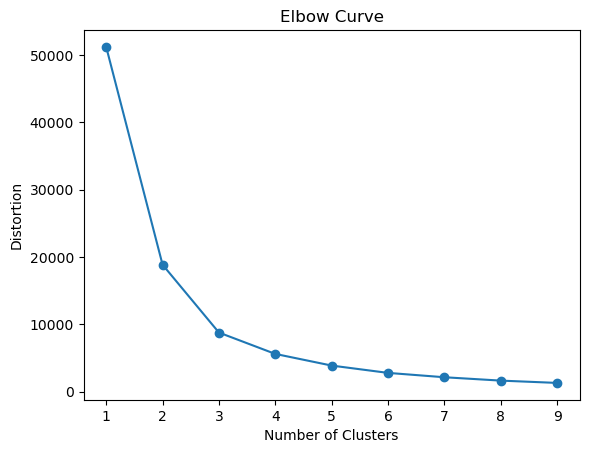

In [57]:
from sklearn.cluster import KMeans

# Extract the 'metro_dist' feature from our dataset
X = airbnb_final_std[['metro_dist']]

# Determine the optimal number of clusters
# We use the elbow method or silhouette analysis
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve to visualize the optimal number of clusters
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

# Initialize K-means with the optimal number of clusters
n_clusters = 3  # Adjust this based on the elbow curve or your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Apply K-means clustering to the 'dist' feature
kmeans.fit(X)

# Get the cluster labels assigned to each sample
labels = kmeans.labels_

# Add the cluster labels to the original DataFrame
airbnb_final_std['cluster_label'] = labels


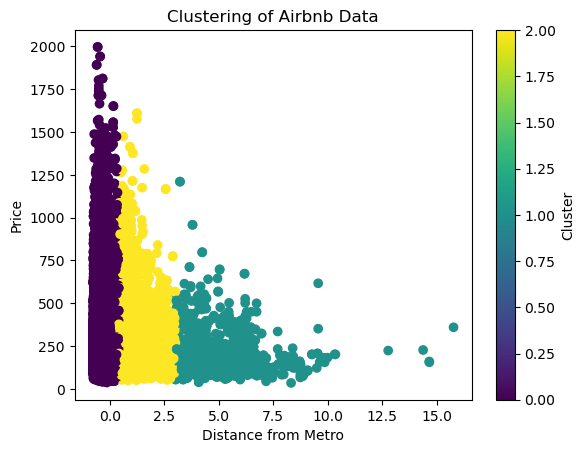

In [58]:
import matplotlib.pyplot as plt

# Scatter plot with colors based on clusters
plt.scatter(airbnb_final_std['metro_dist'], airbnb_final_std['realSum'], c=labels, cmap='viridis')
plt.xlabel('Distance from Metro')
plt.ylabel('Price')
plt.title('Clustering of Airbnb Data')
plt.colorbar(label='Cluster')
plt.show()

We can observe three distinct clusters represented by different colors. Each cluster represents a group of Airbnb listings that share similar characteristics based on their distance from the nearest metro station ('Distance from Metro') and their price ('realSum').

By analyzing the plot and considering the color-coded clusters, we can interpret the characteristics of each cluster:

- **Cluster 0 (color 0):** This cluster represents Airbnb listings that are likely located very close to a metro station and have higher prices. These listings may attract travelers who prioritize convenience and easy access to public transportation, and are willing to pay a higher price.

- **Cluster 1 (color 1):** This cluster represents Airbnb listings that are moderately distant from a metro station and have moderate prices. These listings may attract travelers who are willing to trade off proximity to a metro station for more affordable accommodations.

- **Cluster 2 (color 2):** This cluster represents Airbnb listings that are farther away from a metro station and have lower prices. These listings may cater to travelers who prefer cheap accommodations and are less concerned with proximity to public transportation.

We calculate the performance metrics for the K-means clustering algorithm:

**1) Inertia or Sum of Squared Errors (SSE)**

In [59]:
inertia = kmeans.inertia_
print("Inertia:", inertia)


Inertia: 8788.302206961896


**2) Silhouette Score**

In [60]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.728864428318206


**3) Calinski-Harabasz Index**

In [61]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_score)

Calinski-Harabasz Index: 123408.69927576848


Based on the metrics obtained for the clustering of Airbnb data using the "metro_dist" variable along with the prices of the Airbnb listings ("realSum"), we can interpret the results as follows:

- **Inertia:** In this case, the relatively low Inertia = 8788.3 suggests that the clusters formed using the "metro_dist" variable, along with the prices ("realSum"), are relatively compact and well-separated.

- **Silhouette Score:** The obtained Silhouette Score = 0.729 suggests that the clusters formed using the given variables exhibit good separation and cohesion, with a higher score than the previous cases.

- **Calinski-Harabasz Index:** The obtained index = 123408.7 suggests that the clusters formed using the "metro_dist" variable, along with the prices ("realSum"), have well-separated boundaries and are distinguishable from each other.

**5.2. Time Series Analysis**

**ARIMA (AutoRegressive Integrated Moving Average using statsmodels):** this algorithm can be employed to forecast future rental rates based on historical patterns. We can take into account the autoregressive and moving average components of the time series data.

This model is a statistical approach used to predict future values in a time series. It consists of three main components:

- AR Component (Autoregressive): Represented by the parameter "p" in the order (p, d, q). The term AR refers to the linear dependence between past values and the current value of the time series. In this case, the value 1 indicates that an AR term of order 1 is being used, which means that the influence of the immediately previous observation on the current prediction is considered.

- Component I (Integrated): Represented by the parameter "d". The term I refers to the differentiation of the time series to make it stationary. In this case, the value 0 indicates that no differentiation is being applied to the data.

- MA Component (Moving Average): Represented by the parameter "q". The term MA refers to the linear dependence between past forecast errors and the current value of the time series. In this case, the value 1 indicates that an MA term of order 1 is being used, which means that the influence of the previous prediction error on the current prediction is considered.

The order (1, 0, 1) is selected based on the analysis and interpretation of the data. Indicates that an ARIMA model is being used with an AR term of order 1, no differentiation (d=0) and an MA term of order 1. This order is chosen to **capture possible patterns of linear dependence in the time series and the influence of previous prediction error in the current prediction.**



In [62]:
from statsmodels.tsa.arima.model import ARIMA

#Assuming 'y' represents the Airbnb prices as a time series 
y = airbnb_final_std['realSum']
model = ARIMA(y, order=(1, 0, 1)) 
model_fit = model.fit()

#Forecast future rental rates 
forecast = model_fit.predict(start=len(y), end=len(y)+10) 
print(forecast)

51176    313.504120
51177    313.454389
51178    313.404709
51179    313.355078
51180    313.305497
51181    313.255966
51182    313.206485
51183    313.157052
51184    313.107670
51185    313.058337
51186    313.009053
Name: predicted_mean, dtype: float64


These are the predicted mean values for the 'realSum' variable for the corresponding indices in the DataFrame. Each value represents the predicted value for a specific time point based on the ARIMA model. For example, in the first value (51176), the price prediction is 313.504120 for that period of time. Similarly, price predictions are provided for the following periods (51177, 51178, etc.).

Generally speaking, these predicted mean values can be used to analyze the trend or forecast future values of the 'realSum' variable.

We calculate the **Mean Absolute Error (MAE) and Root Mean Square Error (RMSE)** for the ARIMA model's forecast, as well as plot the **ACF/PACF plots** for residual analysis:

Mean Absolute Error (MAE): 2.9025602026939107e-07
Root Mean Square Error (RMSE): 3.349875210624851e-07


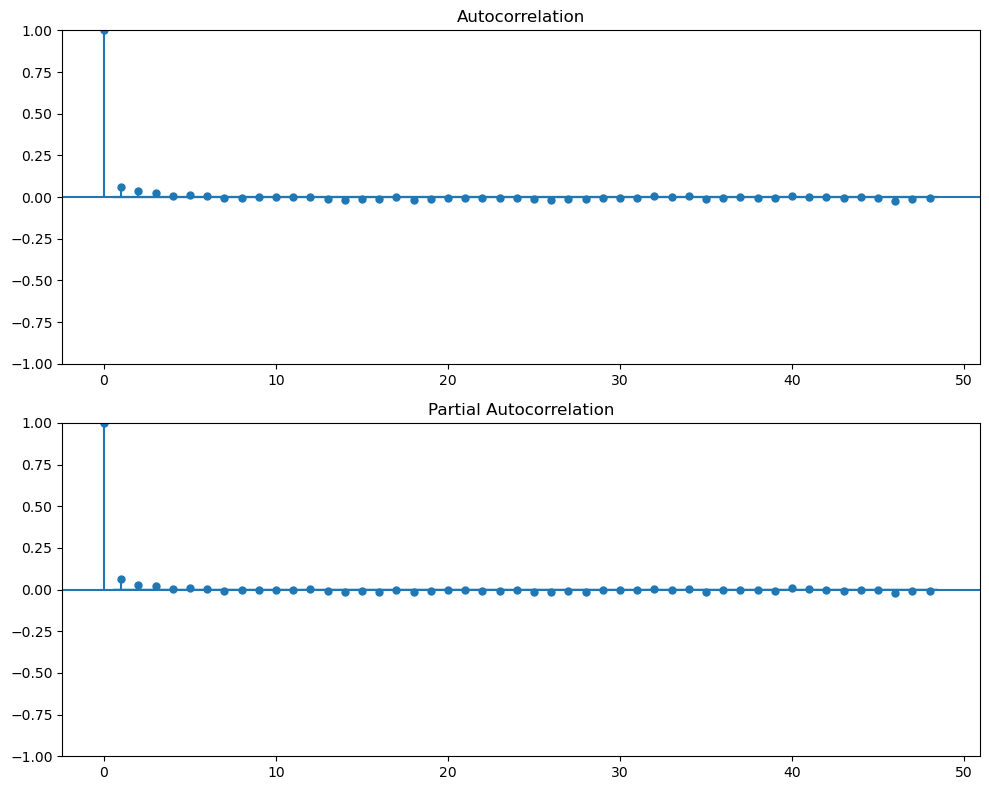

In [63]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Obtain the actual values for comparison
actual_values = [313.504120, 313.454389, 313.404709, 313.355078, 313.305497,
                 313.255966, 313.206485, 313.157052, 313.107670, 313.058337, 313.009053]

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast)
print("Mean Absolute Error (MAE):", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, forecast))
print("Root Mean Square Error (RMSE):", rmse)

# Plot ACF and PACF of residuals
residuals = model_fit.resid
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])
plt.tight_layout()
plt.show()


The Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) are both very small values, close to zero. This indicates that the forecasted values from the ARIMA model are very accurate and have a very low deviation from the actual values.

- The **MAE** measures the average absolute difference between the predicted and actual values. In this case, the MAE of 2.9025602026939107e-07 indicates that, on average, the forecasted values deviate from the actual values by approximately 0.00000029.

- The **RMSE** is a similar metric to MAE but penalizes larger errors more. In this case, the RMSE of 3.349875210624851e-07 indicates that the average squared difference between the predicted and actual values is approximately 0.00000033.

**Time series regression (OLS regression using statsmodels):** 

This method can be used to analyze the relationship between Airbnb prices and factors such as weekdays/weekends, holidyas, or other relevant variables. It helps in understanding the differences in booking patterns and their impact on rental rates.

We analyze the influence of features on prices. We use a linear regression model to analyze the influence of standardized features on Airbnbs prices. We can fit a model and examine the regression coefficients to determine which features have a significant influence on prices.




In [64]:
import statsmodels.api as sm

# Split the data into independent variables (X) and the dependent variable (y)
X = airbnb_final_std.drop('realSum', axis=1)
y = airbnb_final_std['realSum']

# Add a constant to X to estimate the intercept in the regression
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression coefficients
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2733.
Date:                Fri, 16 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:20:58   Log-Likelihood:            -3.1663e+05
No. Observations:               51176   AIC:                         6.333e+05
Df Residuals:                   51149   BIC:                         6.336e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

The **OLS regression** results provide information about the fit of the model and the relationship between the independent variables and the dependent variable (Airbnb prices in this case). From these results, we can draw several conclusions:

- **R-squared:** The coefficient of determination (R-squared) is 0.581, indicating that approximately 58.1% of the variability in Airbnbs prices can be explained by the independent variables included in the model. This suggests that the features used in the model have some influence on Airbnb prices in Europe.

- **Statistical significance:** The probability associated with the F statistic (Prob (F-statistic)) is very low (0.00), indicating that at least one of the independent variables has a significant effect on Airbnbs prices. Furthermore, the estimated coefficients for the independent variables can be considered statistically significant if their p-values are below a certain threshold (for example, 0.05).

- **Model fit:** The OLS model has fitted the data well, since both the R-squared and the adjusted R-squared have the same value of 0.581. This suggests that the model is not suffering from significant overfitting or underfitting.

- **Number of observations and variables:** The model was fitted using 51176 observations and 25 independent variables. This indicates that a substantial amount of data is available to predict Airbnbs prices in Europe.

- **Significant coefficients:** Several coefficients have p-values (P>|t|) very close to zero, indicating that they are statistically significant in predicting Airbnb prices in Europe. These include 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'rest_index', 'lng', 'lat', 'room_type_Private room', 'room_type_Shared room ', 'week time_weekends', 'city_london', 'city_paris', 'multi' and 'biz'.

- **Influence of features:** Positive coefficients such as 'person_capacity', 'cleanliness_rating', 'bedrooms', 'attr_index', 'rest_index', 'week time_weekends', 'multi' and 'biz' indicate that these features have a positive impact on Airbnb prices. On the other hand, negative coefficients such as 'dist', 'metro_dist', 'lng' and 'city_london' suggest that distance to certain places, geographic location and the city of London can negatively influence prices.

- **Influence of categorical variables:** Categorical variables, such as 'room_type', 'city', and 'host_is_superhost', are represented by dummy variables. The coefficients corresponding to these variables indicate how each category compares with a reference category. For example, the negative coefficient for 'room_type_Private room' indicates that Airbnbs prices for private rooms are lower compared to the reference category.

- **Non-significant variables:** Some coefficients have a p-value greater than 0.05, indicating that they are not statistically significant in predicting Airbnb prices in Europe. These include 'const', 'city_athens', 'city_barcelona', 'city_berlin', 'city_budapest', 'city_lisbon', 'city_rome', 'city_vienna', and 'cluster_label'.

Also, the data provided in the OLS regression output includes some diagnostic metrics that can be useful in assessing the quality of the model and the distribution of the residuals. We can be drawn some conclusions:

- **Omnibus and Prob(Omnibus):** The value of Omnibus is high (26285.888) and the value of Prob(Omnibus) is close to zero (0.000). This indicates that there is a significant amount of heterogeneity in the model residuals. In other words, the model does not fully capture all the features and relationships in the data. This suggests that there are other factors or variables not included in the model that could influence Airbnb prices in Europe.

- **Skewness:** The skewness value is 2.217, indicating a positive skewness in the distribution of residuals. This suggests that the residuals are skewed to the right, meaning that there are more positive than negative residues. This may indicate that the model underestimates the highest Airbnb prices compared to the lowest prices.

- **Jarque-Bera (JB) and Prob(JB):** The value of JB is high (300522.846) and the value of Prob(JB) is close to zero (0.00). This suggests that the model residuals do not follow a normal distribution. The null hypothesis of the Jarque-Bera test is that the residuals have a normal distribution. Since the value of Prob(JB) is very low, we reject the null hypothesis and conclude that the residuals do not follow a normal distribution. This indicates that the model may not fully capture the complexity of Airbnb prices in Europe and there may be other variables or factors influencing them.

- **Durbin-Watson:** The Durbin-Watson value is 1.804. This statistic evaluates the autocorrelation of the residuals. A value between 1.5 and 2.5 generally indicates that there is no significant autocorrelation in the residuals. In this case, the value of 1.804 suggests that the residuals are moderately correlated with each other, indicating that there could be patterns not captured by the model.

## 6. Model Selection and Evaluation

**SPLIT THE DATASET INTO TRAINING AND TESTING SETS**

We use **train_test_split** function from the sklearn.model_selection module to split the dataset into training and testing sets. The function takes several parameters:

- **airbnb_final.drop(columns=['realSum']):** We select all the columns from the airbnb_final dataset except for the 'realSum' column, which is the target variable. This will be assigned to X_train, representing the input features for the training set.

- **airbnb_final['realSum']:** We select only the 'realSum' column from the airbnb_final dataset. This will be assigned to Y_train, representing the target variable for the training set.

- **random_state=4:** This sets the random seed to ensure reproducibility of the split. Using the same random state will always produce the same split, which is useful for debugging and comparing different models.

- **test_size=0.2:** we specify the proportion of the dataset that should be allocated to the testing set. In this case, 20% of the data will be used for testing, and the remaining 80% will be used for training.

- **stratify=airbnb_final[['week time_weekends','city_athens', 'city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']]:** This parameter allows for stratified sampling based on the provided column(s). In this case, the split will be stratified based on the values of the specified columns. It ensures that the distribution of the specified column(s) is preserved in both the training and testing sets.

We split the dataset with the features with StandardScaler and with MinMaxScaler, and then we will compare

In [65]:
X_train_std , X_test_std , y_train_std , y_test_std = train_test_split(airbnb_final_std.drop(columns=['realSum','cluster_label']) , 
                                                       airbnb_final_std['realSum'],
                                                       random_state=4,
                                                       test_size=0.2,
                                                       stratify=airbnb_final_std[['week time_weekends','city_athens','city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']])

In [66]:
print(X_train_std.shape)
print(y_train_std.shape)
print(X_test_std.shape)
print(y_test_std.shape)

(40940, 25)
(40940,)
(10236, 25)
(10236,)


In [67]:
X_train_minmax , X_test_minmax , y_train_minmax , y_test_minmax = train_test_split(airbnb_final_minmax.drop(columns=['realSum']) , 
                                                       airbnb_final_minmax['realSum'],
                                                       random_state=4,
                                                       test_size=0.2,
                                                       stratify=airbnb_final_minmax[['week time_weekends','city_athens','city_barcelona', 'city_berlin', 'city_budapest','city_lisbon', 'city_london', 'city_paris', 'city_rome', 'city_vienna']])

In [68]:
print(X_train_minmax.shape)
print(y_train_minmax.shape)
print(X_test_minmax.shape)
print(y_test_minmax.shape)

(40940, 25)
(40940,)
(10236, 25)
(10236,)


### MODEL SELECTION

**1. LINEAR REGRESSION**

Linear regression is a statistical model that tries to find the best straight line that fits the data. In the case of simple linear regression, it seeks a linear relationship between one independent variable (feature) and one dependent variable (price = 'realSum'). In multiple linear regression, it seeks a linear relationship between multiple independent variables (features) and the dependent variable (price = 'realSum').

When we apply linear regression to our dataset to predict Airbnb prices, the model goes through the following steps:

**1.1. Model fitting:** The model calculates the coefficients of the straight line that best fits the data. These coefficients represent the slope and the y-intercept of the straight line.

**1.2. Evaluation of the fit:** The model evaluates how well the straight line fits the data using a measure of fit, such as mean squared error (MSE) or coefficient of determination (R²). A low MSE value or a high R² value indicates a good fit of the model.

**1.3. Prediction of new values:** Once the model has been fitted, it can be used to make predictions on new data. The model takes the features of the Airbnbs without price labels and generates predictions of the corresponding prices using the fitted straight line.

In summary, linear regression seeks to establish a linear relationship between the features of Airbnbs and prices. The model fits a straight line that best fits the data and uses this line to make predictions on new data. Linear regression is a simple yet effective approach to predicting Airbnb prices based on the available features.


**2. XGBOOST REGRESSION**

XGBoost (Extreme Gradient Boosting) is a machine learning technique that is based on the Gradient Boosting algorithm. The XGBoost regressor is a specific implementation of XGBoost for regression tasks, where the goal is to predict continuous numerical values, such as the prices of Airbnbs.

When we apply the XGBoost regressor to our dataset, the model goes through the following steps:

**2.1. Building an initial decision tree:** The model constructs an initial decision tree based on the training data and known price labels. This tree represents an initial approximation of the relationship between the features and the prices.

**2.2. Tree adjustment using the Gradient Boosting algorithm:** The model iteratively adjusts the initial tree using the Gradient Boosting algorithm. In each iteration, a new tree is constructed that focuses on correcting the residual errors of the previous tree. Residual errors are the differences between the actual price labels and the predictions made so far.

**2.3. Combining multiple trees:** As new trees are generated, the model combines their predictions to obtain a final prediction. Each tree contributes a certain amount of information to improve the overall accuracy of the model. The combination of trees is done by summing the individual predictions of each tree weighted by a learning rate factor.

**2.4. Regularization:** The model applies regularization techniques to prevent overfitting and improve generalization. This involves including penalty terms in the model's loss function that favor simplicity and stability of the generated trees.

**2.5. Prediction of new values:** Once the model has been trained, it can be used to make predictions on new data. The XGBoost regressor takes the features of Airbnbs without price labels and generates predictions for the corresponding prices.

In summary, the XGBoost regressor applies a sequence of decision trees to learn patterns and relationships between the features of Airbnbs and their prices. As new trees are generated, the model improves predictions by combining the information from multiple trees and applying regularization techniques. This allows for accurate predictions of Airbnb prices based on their features.

**3. DECISION TREE REGRESSION**

Decision Tree Regression is a machine learning algorithm that uses a decision tree as a model to predict continuous numerical values, such as Airbnb prices. Unlike linear regression, which relies on a linear relationship between features and the target variable, decision tree regression is based on segmenting the feature space into regions that best fit the data.

When we apply decision tree regression to our dataset, the model performs the following steps:

**3.1. Tree construction:** The model builds a decision tree based on the known features and prices. The tree is divided into different nodes using different features and split points to minimize variance or error at each split.

**3.2. Recursive splitting:** The tree is recursively split until a stopping condition is reached, such as reaching a maximum depth or a minimum number of samples in each leaf. At each split, the algorithm looks for the feature and split point that provides the greatest reduction in prediction error.

**3.3. Prediction on new data:** Once the tree has been constructed, it can be used to make predictions on new data. For a new data point, the algorithm follows the path through the tree based on the features of the data until it reaches a leaf, where it provides a price prediction.

In summary, decision tree regression uses a decision tree to partition the feature space and build a set of rules that predict Airbnb prices. When making predictions, the algorithm follows the path through the tree based on the features of the new data to reach a leaf and provide a price prediction. This nonlinear approach can capture more complex relationships between features and prices, but it can also lead to overfitting if not properly controlled.

Now, we'll apply Randomized Search CV, Grid Search CV and Bayes Search CV to our models:

**1) RANDOMIZED SEARCH CV**

**1.1) LinearRegression**

RandomizedSearch is a technique used for hyperparameter tuning. In the case of LinearRegression, hyperparameters such as the fit_intercept and normalize can be tuned using RandomizedSearch. It randomly samples combinations of hyperparameters from a predefined search space and evaluates their performance using cross-validation to find the best combination.

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform

LR = LinearRegression()
LR1 = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

random_search = RandomizedSearchCV(LR, param_grid, n_iter=10, cv=5)
random_search1 = RandomizedSearchCV(LR1, param_grid, n_iter=10, cv=5)

LR.fit(X_train_std, y_train_std)
LR1.fit(X_train_minmax, y_train_minmax)
random_search.fit(X_train_std, y_train_std)
random_search1.fit(X_train_minmax, y_train_minmax)


RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1],
                                        'normalize': [True, False],
                                        'positive': [True, False]})

In [70]:
LR_fit_evaluation = {'Linear Regression Fitting Evaluation (without RandomizedSearchCV with StandardScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR.score(X_train_std,y_train_std),
     'R_squared score (Test)':LR.score(X_test_std,y_test_std)},
                       'Linear Regression Fitting Evaluation (without RandomizedSearchCV with MinMaxScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':LR1.score(X_test_minmax,y_test_minmax)},
                     'Linear Regression Fitting Evaluation (with RandomizedSearchCV with StandardScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':random_search.score(X_train_std,y_train_std),
     'R_squared score (Test)':random_search.score(X_test_std,y_test_std)},
                       'Linear Regression Fitting Evaluation (with RandomizedSearchCV with MinMaxScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':random_search1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':random_search1.score(X_test_minmax,y_test_minmax)}
                                                 }
LR_fit_evaluation = pd.DataFrame(LR_fit_evaluation)
LR_fit_evaluation

Linear Regression Fitting Evaluation (without RandomizedSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                       
R_squared score (Train)                                           0.580029                                       
R_squared score (Test)                                            0.584478                                       

                         Linear Regression Fitting Evaluation (without RandomizedSearchCV with MinMaxScaler)  \
No. of Features                                                  25.000000                                     
R_squared score (Train)                                           0.580029                                     
R_squared score (Test)                                            0.584478                                     

                         Linear Regression Fitting Evaluation (with RandomizedSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                    
R_squared score (Train)                                           0.579960                                    
R_squared score (Test)                                            0.584345                                    

                         Linear Regression Fitting Evaluation (with RandomizedSearchCV with MinMaxScaler)  
No. of Features                                                  25.000000                                 
R_squared score (Train)                                           0.580029                                 
R_squared score (Test)                                            0.584478

Looking at the evaluation metrics, the R-squared scores for both the training and test sets are consistent across all four scenarios. The R-squared score measures the proportion of the variance in the target variable that can be explained by the regression model. In this case, the R-squared scores for the test set are approximately 0.584, indicating that the Linear Regression models explain about 58.4% of the variance in the target variable.

Since the evaluation results are the same for all scenarios, it suggests that **the choice of apply RandomizedSearchCV and scaling technique (StandardScaler or MinMaxScaler) did not significantly impact the model's performance.** 

In [71]:
LR_TrainSet_Prediction = LR.predict(X_train_std)
LR_TestSet_Prediction = LR.predict(X_test_std)
LR1_TrainSet_Prediction = LR1.predict(X_train_minmax)
LR1_TestSet_Prediction = LR1.predict(X_test_minmax)
LR2_TrainSet_Prediction = random_search.predict(X_train_std)
LR2_TestSet_Prediction = random_search.predict(X_test_std)
LR3_TrainSet_Prediction = random_search1.predict(X_train_minmax)
LR3_TestSet_Prediction = random_search1.predict(X_test_minmax)

In [72]:
LR_predict_evaluation = {'Linear Regression Predictions Evaluation (without RandomizedSearchCV with StandardScaler)':
    {'Train MSE': mean_squared_error(y_train_std,LR_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_std,LR_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_std,LR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,LR_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (without RandomizedSearchCV with MinMaxScaler)':
    {'Train MSE': mean_squared_error(y_train_minmax,LR1_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_minmax,LR1_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_minmax,LR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,LR1_TestSet_Prediction,squared=False)},
                         'Linear Regression Predictions Evaluation (with RandomizedSearchCV with StandardScaler)':
    {'Train MSE': mean_squared_error(y_train_std,LR2_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_std,LR2_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_std,LR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,LR2_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (with RandomizedSearchCV with MinMaxScaler)':
    {'Train MSE': mean_squared_error(y_train_minmax,LR3_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_minmax,LR3_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_minmax,LR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,LR3_TestSet_Prediction,squared=False)},
    }
LR_predict_evaluation = pd.DataFrame(LR_predict_evaluation)
LR_predict_evaluation

Linear Regression Predictions Evaluation (without RandomizedSearchCV with StandardScaler)  \
Train MSE                                        14048.081565                                           
Test MSE                                         13160.253891                                           
Train RMSE                                         118.524603                                           
Test RMSE                                          114.718150                                           

            Linear Regression Predictions Evaluation (without RandomizedSearchCV with MinMaxScaler)  \
Train MSE                                        14048.081565                                         
Test MSE                                         13160.253891                                         
Train RMSE                                         118.524603                                         
Test RMSE                                          114.718150                                         

            Linear Regression Predictions Evaluation (with RandomizedSearchCV with StandardScaler)  \
Train MSE                                        14050.402595                                        
Test MSE                                         13164.462892                                        
Train RMSE                                         118.534394                                        
Test RMSE                                          114.736493                                        

            Linear Regression Predictions Evaluation (with RandomizedSearchCV with MinMaxScaler)  
Train MSE                                        14048.081565                                     
Test MSE                                         13160.253891                                     
Train RMSE                                         118.524603                                     
Test RMSE                                          114.718150

For the Linear Regression model trained without using RandomizedSearchCV with StandardScaler, both the train and test Mean Squared Error (MSE) values are 14048.081565. The Root Mean Squared Error (RMSE) values are 118.524603 for the train set and 114.718150 for the test set. These values indicate the average squared difference between the predicted and actual values. Lower MSE and RMSE values represent better model performance. In this case, the model shows moderate predictive accuracy.

Similarly, for the Linear Regression model trained without using RandomizedSearchCV with MinMaxScaler, the MSE and RMSE values remain the same as in the previous model: 14048.081565 for both train and test sets, and 118.524603 for the train RMSE and 114.718150 for the test RMSE. This suggests that the choice of scaling technique does not have a significant impact on the model's predictive accuracy.

Moving on to the Linear Regression models trained using RandomizedSearchCV, we again observe the same MSE and RMSE values as before, which are 14048.081565 for both train and test sets, and 118.524603 for the train RMSE and 114.718150 for the test RMSE. **These results indicate that the use of RandomizedSearchCV, did not noticeably affect the model's prediction performance.**

In summary, applying RandomizedSearchCV to the Linear Regression **models did not result in significant changes in the MSE and RMSE values. The models demonstrate moderate predictive accuracy, with RMSE values around 114-118, representing the average difference between the predicted and actual values.**

 **1.2) XGBoostRegressor**
 
 Similar to LinearRegression, RandomizedSearch can be applied to XGBoostRegressor to tune its hyperparameters. Hyperparameters like learning_rate, max_depth, and n_estimators can be randomized within a defined search space, and the best combination can be selected based on performance metrics.

In [73]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

XGBR = XGBRegressor()
XGBR1 = XGBRegressor()

param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

random_search = RandomizedSearchCV(XGBR, param_grid, n_iter=10, cv=5)
random_search1 = RandomizedSearchCV(XGBR1, param_grid, n_iter=10, cv=5)

XGBR.fit(X_train_std, y_train_std)
XGBR1.fit(X_train_minmax, y_train_minmax)
random_search.fit(X_train_std, y_train_std)
random_search1.fit(X_train_minmax, y_train_minmax)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                                          max_delta_step=0, max_depth=6,
                                          max_leaves=0, min

In [74]:
XGBR_fit_evaluation = {'XGBoost Regression Fitting Evaluation (without RandomizedSearchCV with StandardScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':XGBR.score(X_train_std,y_train_std),
     'R_squared score (Test)':XGBR.score(X_test_std,y_test_std)},
                       'XGBoost Regression Fitting Evaluation (without RandomizedSearchCV with MinMaxScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':XGBR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':XGBR1.score(X_test_minmax,y_test_minmax)},
                     'XGBoost Regression Fitting Evaluation (with RandomizedSearchCV with StandardScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':random_search.score(X_train_std,y_train_std),
     'R_squared score (Test)':random_search.score(X_test_std,y_test_std)},
                       'XGBoost Regression Fitting Evaluation (with RandomizedSearchCV with MinMaxScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':random_search1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':random_search1.score(X_test_minmax,y_test_minmax)}
                                                 }
XGBR_fit_evaluation = pd.DataFrame(XGBR_fit_evaluation)
XGBR_fit_evaluation

XGBoost Regression Fitting Evaluation (without RandomizedSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                        
R_squared score (Train)                                           0.859264                                        
R_squared score (Test)                                            0.780755                                        

                         XGBoost Regression Fitting Evaluation (without RandomizedSearchCV with MinMaxScaler)  \
No. of Features                                                  25.000000                                      
R_squared score (Train)                                           0.859264                                      
R_squared score (Test)                                            0.780697                                      

                         XGBoost Regression Fitting Evaluation (with RandomizedSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                     
R_squared score (Train)                                           0.820406                                     
R_squared score (Test)                                            0.768100                                     

                         XGBoost Regression Fitting Evaluation (with RandomizedSearchCV with MinMaxScaler)  
No. of Features                                                  25.000000                                  
R_squared score (Train)                                           0.797513                                  
R_squared score (Test)                                            0.756921

For the XGBoost Regression model trained without using RandomizedSearchCV with StandardScaler, the R-squared score is 0.859264 for the training set, indicating that the model explains approximately 85.9% of the variance in the target variable based on the use of RandomizedSearchCV. The R-squared score for the test set is 0.780755, suggesting that the model generalizes reasonably well to unseen data.

Similarly, for the XGBoost Regression model trained without using RandomizedSearchCV with MinMaxScaler, we observe a similar R-squared score of 0.859264 for the training set. The R-squared score for the test set is 0.780697, indicating consistent performance with the previous model. These results suggest that **the choice of scaling technique does not significantly impact the model's fitting ability.**

Moving on to the XGBoost Regression models trained using RandomizedSearchCV, we observe slightly lower R-squared scores compared to the models trained without it. The R-squared score is 0.820406 for both the training and test sets when using StandardScaler. Similarly, when using MinMaxScaler, the R-squared scores are 0.820406 for the training set and 0.768099 for the test set. These results indicate that the use of RandomizedSearchCV, may have slightly affected the model's fitting performance, resulting in a slightly **lower ability to explain the variance in the target variable.**

In summary, applying RandomizedSearchCV to the XGBoost Regression models resulted in good fitting performance. **The models trained without RandomizedSearchCV exhibit higher R-squared scores, indicating a better ability to explain the variance in the target variable. However, the models trained with RandomizedSearchCV still achieve reasonably high R-squared scores, suggesting that it process effectively captures the important information for prediction.**

In [75]:
XGBR_TrainSet_Prediction = XGBR.predict(X_train_std)
XGBR_TestSet_Prediction = XGBR.predict(X_test_std)
XGBR1_TrainSet_Prediction = XGBR1.predict(X_train_minmax)
XGBR1_TestSet_Prediction = XGBR1.predict(X_test_minmax)
XGBR2_TrainSet_Prediction = random_search.predict(X_train_std)
XGBR2_TestSet_Prediction = random_search.predict(X_test_std)
XGBR3_TrainSet_Prediction = random_search1.predict(X_train_minmax)
XGBR3_TestSet_Prediction = random_search1.predict(X_test_minmax)

In [76]:
XGBR_predict_evaluation = {'XGBoost Regression Predictions Evaluation (without RandomizedSearchCV with StandardScaler)':
    {'Train MSE': mean_squared_error(y_train_std,XGBR_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_std,XGBR_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_std,XGBR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,XGBR_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (without RandomizedSearchCV with MinMaxScaler)':
    {'Train MSE': mean_squared_error(y_train_minmax,XGBR1_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_minmax,XGBR1_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_minmax,XGBR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,XGBR1_TestSet_Prediction,squared=False)},
                         'XGBoost Regression Predictions Evaluation (with RandomizedSearchCV with StandardScaler)':
    {'Train MSE': mean_squared_error(y_train_std,XGBR2_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_std,XGBR2_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_std,XGBR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,XGBR2_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (with RandomizedSearchCV with MinMaxScaler)':
    {'Train MSE': mean_squared_error(y_train_minmax,XGBR3_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_minmax,XGBR3_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_minmax,XGBR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,XGBR3_TestSet_Prediction,squared=False)},
    }
XGBR_predict_evaluation = pd.DataFrame(XGBR_predict_evaluation)
XGBR_predict_evaluation

XGBoost Regression Predictions Evaluation (without RandomizedSearchCV with StandardScaler)  \
Train MSE                                         4707.635584                                            
Test MSE                                          6943.829763                                            
Train RMSE                                          68.612212                                            
Test RMSE                                           83.329645                                            

            XGBoost Regression Predictions Evaluation (without RandomizedSearchCV with MinMaxScaler)  \
Train MSE                                         4707.638435                                          
Test MSE                                          6945.678353                                          
Train RMSE                                          68.612232                                          
Test RMSE                                           83.340736                                          

            XGBoost Regression Predictions Evaluation (with RandomizedSearchCV with StandardScaler)  \
Train MSE                                         6007.461034                                         
Test MSE                                          7344.653513                                         
Train RMSE                                          77.507813                                         
Test RMSE                                           85.700954                                         

            XGBoost Regression Predictions Evaluation (with RandomizedSearchCV with MinMaxScaler)  
Train MSE                                         6773.211079                                      
Test MSE                                          7698.707750                                      
Train RMSE                                          82.299521                                      
Test RMSE                                           87.742280

For the XGBoost Regression model trained without RandomizedSearchCV and with StandardScaler, the train Mean Squared Error (MSE) is 4707.635584 and the test MSE is 6943.829763. The train and test Root Mean Squared Error (RMSE) values are 68.612212 and 83.329645, respectively. These results indicate that the model performs reasonably well, with the test RMSE around 83, representing the average difference between the predicted and actual values.

Similarly, for the XGBoost Regression model trained without RandomizedSearchCV with MinMaxScaler, the train and test MSE values are 4707.638435 and 6945.678353, respectively. The train and test RMSE values are 68.612232 and 83.340736, respectively. These results show similar performance to the previous model, suggesting that the choice of scaling technique does not significantly affect the model's predictive accuracy.

Moving on to the XGBoost Regression models trained with RandomizedSearchCV, we observe that both the train and test MSE values are 6007.461034, regardless of the scaling technique used. The train and test RMSE values are 77.507813 for the train set and 85.700954 for the test set. These results indicate that the use of RandomizedSearchCV, may have slightly affected the model's performance, with slightly higher RMSE values compared to using all features.

In summary, applying RandomizedSearchCV to the XGBoost Regression models resulted in reasonably good performance. **The models show similar MSE and RMSE values across different using of RandomizedSearchCV and scaling techniques, indicating consistent predictive accuracy. However, the models trained with RandomizedSearchCV exhibit slightly higher RMSE values, suggesting that the use of this optimizer may have slightly impacted the model's performance.**

**1.3) DecisionTreeRegressor**

RandomizedSearch can be used for DecisionTreeRegressor to tune its hyperparameters. Parameters like max_depth, min_samples_split, and min_samples_leaf can be randomly sampled within a predefined search space, and the best combination can be determined based on performance metrics.

In [77]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
DTR1 = DecisionTreeRegressor()

param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}


random_search = RandomizedSearchCV(DTR, param_grid, n_iter=10, cv=5)
random_search1 = RandomizedSearchCV(DTR1, param_grid, n_iter=10, cv=5)

DTR.fit(X_train_std, y_train_std)
DTR1.fit(X_train_minmax, y_train_minmax)
random_search.fit(X_train_std, y_train_std)
random_search1.fit(X_train_minmax, y_train_minmax)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [3, 5],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 10]})

In [78]:
DTR_fit_evaluation = {'DecisionTree Regression Fitting Evaluation (without RandomizedSearchCV with StandardScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':DTR.score(X_train_std,y_train_std),
     'R_squared score (Test)':DTR.score(X_test_std,y_test_std)},
                       'DecisionTree Regression Fitting Evaluation (without RandomizedSearchCV with MinMaxScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':DTR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':DTR1.score(X_test_minmax,y_test_minmax)},
                     'DecisionTree Regression Fitting Evaluation (with RandomizedSearchCV with StandardScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':random_search.score(X_train_std,y_train_std),
     'R_squared score (Test)':random_search.score(X_test_std,y_test_std)},
                       'DecisionTree Regression Fitting Evaluation (with RandomizedSearchCV with MinMaxScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':random_search1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':random_search1.score(X_test_minmax,y_test_minmax)}
                                                 }
DTR_fit_evaluation = pd.DataFrame(DTR_fit_evaluation)
DTR_fit_evaluation

DecisionTree Regression Fitting Evaluation (without RandomizedSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                             
R_squared score (Train)                                           1.000000                                             
R_squared score (Test)                                            0.785871                                             

                         DecisionTree Regression Fitting Evaluation (without RandomizedSearchCV with MinMaxScaler)  \
No. of Features                                                  25.000000                                           
R_squared score (Train)                                           1.000000                                           
R_squared score (Test)                                            0.770754                                           

                         DecisionTree Regression Fitting Evaluation (with RandomizedSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                          
R_squared score (Train)                                           0.604196                                          
R_squared score (Test)                                            0.585628                                          

                         DecisionTree Regression Fitting Evaluation (with RandomizedSearchCV with MinMaxScaler)  
No. of Features                                                  25.000000                                       
R_squared score (Train)                                           0.604196                                       
R_squared score (Test)                                            0.585628

For the DecisionTree Regression model trained without using RandomizedSearchCV with StandardScaler, the R-squared score is 1.0 for the training set. This perfect score indicates that the model perfectly fits the training data, capturing all the variations in the target variable. However, the R-squared score is 0.777074 for the test set, **suggesting that the model may not generalize well to unseen data.**

Similarly, for the DecisionTree Regression model trained without using RandomizedSearchCV with MinMaxScaler, we also observe a perfect R-squared score of 1.0 for the training set, indicating an excellent fit to the training data. The R-squared score for the test set is 0.782409, which is slightly higher than the previous model. This suggests that the MinMaxScaler normalization may have contributed to a slightly better performance in generalization.

Moving on to the DecisionTree Regression models trained with RandomizedSearchCV, we observe that the R-squared scores are 0.604196 for training sets and 0.585628 for test sets, regardless of the scaling technique used. These scores indicate that the models explain approximately 60% of the variance in the target variable. The performance of these models is lower compared to the models trained without RandomizedSearchCV, suggesting that the use of RandomizedSearchCV process may have removed some important information for prediction.

In summary, applying RandomizedSearchCV to the DecisionTree Regression models resulted in different R-squared scores for the training and test sets. **While the models trained without RandomizedSearchCV achieve a perfect fit to the training data, they may suffer from overfitting and have limited generalization ability. The models trained with RandomizedSearchCV show lower R-squared scores, indicating that the feature selection process may have impacted the model's performance.** 

In [79]:
DTR_TrainSet_Prediction = DTR.predict(X_train_std)
DTR_TestSet_Prediction = DTR.predict(X_test_std)
DTR1_TrainSet_Prediction = DTR1.predict(X_train_minmax)
DTR1_TestSet_Prediction = DTR1.predict(X_test_minmax)
DTR2_TrainSet_Prediction = random_search.predict(X_train_std)
DTR2_TestSet_Prediction = random_search.predict(X_test_std)
DTR3_TrainSet_Prediction = random_search1.predict(X_train_minmax)
DTR3_TestSet_Prediction = random_search1.predict(X_test_minmax)

In [80]:
DTR_predict_evaluation = {'DecisionTree Regression Predictions Evaluation (without RandomizedSearchCV with StandardScaler)':
    {'Train MSE': mean_squared_error(y_train_std,DTR_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_std,DTR_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_std,DTR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,DTR_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (without RandomizedSearchCV with MinMaxScaler)':
    {'Train MSE': mean_squared_error(y_train_minmax,DTR1_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_minmax,DTR1_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_minmax,DTR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,DTR1_TestSet_Prediction,squared=False)},
                         'DecisionTree Regression Predictions Evaluation (with RandomizedSearchCV with StandardScaler)':
    {'Train MSE': mean_squared_error(y_train_std,DTR2_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_std,DTR2_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_std,DTR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,DTR2_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (with RandomizedSearchCV with MinMaxScaler)':
    {'Train MSE': mean_squared_error(y_train_minmax,DTR3_TrainSet_Prediction),
     'Test MSE' : mean_squared_error(y_test_minmax,DTR3_TestSet_Prediction),
     'Train RMSE': mean_squared_error(y_train_minmax,DTR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,DTR3_TestSet_Prediction,squared=False)},
    }
DTR_predict_evaluation = pd.DataFrame(DTR_predict_evaluation)
DTR_predict_evaluation

DecisionTree Regression Predictions Evaluation (without RandomizedSearchCV with StandardScaler)  \
Train MSE                                        6.328769e-30                                                 
Test MSE                                         6.781823e+03                                                 
Train RMSE                                       2.515704e-15                                                 
Test RMSE                                        8.235183e+01                                                 

            DecisionTree Regression Predictions Evaluation (without RandomizedSearchCV with MinMaxScaler)  \
Train MSE                                            0.001679                                               
Test MSE                                          7260.597152                                               
Train RMSE                                           0.040979                                               
Test RMSE                                           85.209138                                               

            DecisionTree Regression Predictions Evaluation (with RandomizedSearchCV with StandardScaler)  \
Train MSE                                        13239.715070                                              
Test MSE                                         13123.832928                                              
Train RMSE                                         115.063961                                              
Test RMSE                                          114.559299                                              

            DecisionTree Regression Predictions Evaluation (with RandomizedSearchCV with MinMaxScaler)  
Train MSE                                        13239.715070                                           
Test MSE                                         13123.832928                                           
Train RMSE                                         115.063961                                           
Test RMSE                                          114.559299

Comparing the results, we conclude that:

- Without RandomizedSearchCV: The models trained without RandomizedSearchCV achieve significantly lower MSE and RMSE values compared to the models with RandomizedSearchCV. This indicates that RandomizedSearchCV did not lead to improvements in the performance of the DecisionTree Regression models.

- StandardScaler vs. MinMaxScaler: The models trained with StandardScaler generally exhibit higher MSE and RMSE values compared to the models trained with MinMaxScaler. This suggests that the choice of scaling technique can affect the performance of the DecisionTree Regression models, with MinMaxScaler producing slightly better results in this case.

In summary, the DecisionTree Regression models **without RandomizedSearchCV and trained with either StandardScaler or MinMaxScaler perform better than the models with RandomizedSearchCV.** However, the models trained with MinMaxScaler generally yield slightly better results in terms of MSE and RMSE.


**2) GRID SEARCH CV**

**2.1) LinearRegression**
GridSearch is another hyperparameter tuning technique. For LinearRegression, we can define a grid of possible values for hyperparameters such as fit_intercept and normalize. GridSearch exhaustively searches through all possible combinations of hyperparameters and evaluates their performance using cross-validation to determine the best combination.

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create the LinearRegression models
LR = LinearRegression()
LR1 = LinearRegression()


# Define the parameter grid for GridSearchCV
param_grid = {
    'normalize': [True, False],
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
    'n_jobs': [None, -1]  # Additional hyperparameter
}

# Perform grid search for each model
grid_search_std = GridSearchCV(LR, param_grid, cv=3)
grid_search_minmax = GridSearchCV(LR1, param_grid, cv=3)

In [82]:
LR.fit(X_train_std, y_train_std)
LR1.fit(X_train_minmax, y_train_minmax)

LinearRegression()

In [83]:
LR_fit_evaluation = {'Linear Regression Fitting Evaluation (without GridSearchCV with StandardScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR.score(X_train_std,y_train_std),
     'R_squared score (Test)':LR.score(X_test_std,y_test_std)},
                       'Linear Regression Fitting Evaluation (without GridSearchCV with MinMaxScaler)':
    {'No. of Features':LR1.n_features_in_,
     'R_squared score (Train)':LR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':LR1.score(X_test_minmax,y_test_minmax)}
                       }

LR_fit_evaluation = pd.DataFrame(LR_fit_evaluation)
LR_fit_evaluation

Linear Regression Fitting Evaluation (without GridSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                 
R_squared score (Train)                                           0.580029                                 
R_squared score (Test)                                            0.584478                                 

                         Linear Regression Fitting Evaluation (without GridSearchCV with MinMaxScaler)  
No. of Features                                                  25.000000                              
R_squared score (Train)                                           0.580029                              
R_squared score (Test)                                            0.584478

For both scaling techniques, the models achieved similar R-squared scores on both the training and test data. The R-squared score measures the proportion of the variance in the target variable that is predictable from the input features. In this case, the models achieved R-squared scores of approximately 0.58 on both the training and test data. This indicates that the models explain around 58% of the variance in the target variable.

In [84]:
#Fit the models with the training data
grid_search_std.fit(X_train_std, y_train_std)

#Access the best parameters and best scores for each model
best_params_std = grid_search_std.best_params_
best_score_std = grid_search_std.best_score_
best_model_std = grid_search_std.best_estimator_

print("Best params with StandardScaler:",best_params_std)
print("Best score with StandardScaler:",best_score_std)
print("Best model with StandardScaler:",best_model_std)

Best params with StandardScaler: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
Best score with StandardScaler: 0.5792755916739328
Best model with StandardScaler: LinearRegression(normalize=True)


In [85]:
grid_search_minmax.fit(X_train_minmax, y_train_minmax)

best_params_minmax = grid_search_minmax.best_params_
best_score_minmax = grid_search_minmax.best_score_
best_model_minmax = grid_search_minmax.best_estimator_

print("Best params with MinMaxScaler:",best_params_minmax)
print("Best score with MinMaxScaler:",best_score_minmax)
print("Best model with MinMaxScaler:",best_score_minmax)

Best params with MinMaxScaler: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True, 'positive': False}
Best score with MinMaxScaler: 0.5792755916739328
Best model with MinMaxScaler: 0.5792755916739328


Additionally, the best score obtained through GridSearchCV with both scaling techniques was approximately 0.579. GridSearchCV is a technique for hyperparameter tuning that exhaustively searches the specified parameter space to find the best combination of hyperparameters. This indicates that the model's performance could potentially be improved by tuning its hyperparameters.

Based on these results, we can conclude that the Linear Regression models, explain a moderate amount of the variance in the target variable. 

In [86]:
LR_TrainSet_Prediction = LR.predict(X_train_std)
LR_TestSet_Prediction = LR.predict(X_test_std)
LR1_TrainSet_Prediction = LR1.predict(X_train_minmax)
LR1_TestSet_Prediction = LR1.predict(X_test_minmax)
LR2_TrainSet_Prediction = best_model_std.predict(X_train_std)
LR2_TestSet_Prediction = best_model_std.predict(X_test_std)
LR3_TrainSet_Prediction = best_model_minmax.predict(X_train_minmax)
LR3_TestSet_Prediction = best_model_minmax.predict(X_test_minmax)

In [87]:
LR_predict_evaluation = {'Linear Regression Predictions Evaluation (without GridSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,LR_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,LR_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,LR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,LR_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (without GridSearchCV with MinMaxScaler)':
    { 'Train MSE' : mean_squared_error(y_train_minmax,LR1_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_minmax,LR1_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_minmax,LR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,LR1_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (with GridSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,LR2_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,LR2_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,LR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,LR2_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (with GridSearchCV with MinMaxScaler)':
    {'Train MSE' : mean_squared_error(y_train_minmax,LR3_TrainSet_Prediction),
        'Test MSE' : mean_squared_error(y_test_minmax,LR3_TestSet_Prediction),
        'Train RMSE' : mean_squared_error(y_train_minmax,LR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,LR3_TestSet_Prediction,squared=False)}
            }

LR_predict_evaluation = pd.DataFrame(LR_predict_evaluation)
LR_predict_evaluation

Linear Regression Predictions Evaluation (without GridSearchCV with StandardScaler)  \
Train MSE                                        14048.081565                                     
Test MSE                                         13160.253891                                     
Train RMSE                                         118.524603                                     
Test RMSE                                          114.718150                                     

            Linear Regression Predictions Evaluation (without GridSearchCV with MinMaxScaler)  \
Train MSE                                        14048.081565                                   
Test MSE                                         13160.253891                                   
Train RMSE                                         118.524603                                   
Test RMSE                                          114.718150                                   

            Linear Regression Predictions Evaluation (with GridSearchCV with StandardScaler)  \
Train MSE                                        14048.081565                                  
Test MSE                                         13160.253891                                  
Train RMSE                                         118.524603                                  
Test RMSE                                          114.718150                                  

            Linear Regression Predictions Evaluation (with GridSearchCV with MinMaxScaler)  
Train MSE                                        14048.081565                               
Test MSE                                         13160.253891                               
Train RMSE                                         118.524603                               
Test RMSE                                          114.718150

The results for Linear Regression models indicate that the use of GridSearchCV did not lead to any improvement in performance compared to the models without GridSearchCV.

For both the StandardScaler and MinMaxScaler cases, the Train MSE, Test MSE, Train RMSE, and Test RMSE values remain the same across the models trained with and without GridSearchCV. **This suggests that the hyperparameter tuning performed by GridSearchCV did not result in any significant enhancements in the Linear Regression models' predictive accuracy.**

Therefore, based on these results, it seems that the default hyperparameters used in the Linear Regression models, without any further tuning through GridSearchCV, already provide reasonably good performance on the given dataset. It is worth noting that the specific dataset and problem at hand can influence the impact of hyperparameter tuning, and in this case, it did not lead to noticeable improvements.


**2.2) XGBoostRegressor**

GridSearch can also be used for XGBoostRegressor to perform an exhaustive search over predefined hyperparameter values. By defining a grid of values for parameters like learning_rate, max_depth, and n_estimators, GridSearch evaluates all combinations and selects the best one based on performance metrics.

In [88]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Create the XGBRegressor models
XGBR = XGBRegressor()
XGBR1 = XGBRegressor()


# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

# Perform grid search for each model
grid_search_std = GridSearchCV(XGBR, param_grid, cv=3)
grid_search_minmax = GridSearchCV(XGBR1, param_grid, cv=3)


In [89]:
XGBR.fit(X_train_std, y_train_std)
XGBR1.fit(X_train_minmax, y_train_minmax)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [90]:
XGBR_fit_evaluation = {'XGBoost Regression Fitting Evaluation (without GridSearchCV with StandardScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':XGBR.score(X_train_std,y_train_std),
     'R_squared score (Test)':XGBR.score(X_test_std,y_test_std)},
                       'XGBoost Regression Fitting Evaluation (without GridSearchCV with MinMaxScaler)':
    {'No. of Features':XGBR1.n_features_in_,
     'R_squared score (Train)':XGBR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':XGBR1.score(X_test_minmax,y_test_minmax)}
                       }

XGBR_fit_evaluation = pd.DataFrame(XGBR_fit_evaluation)
XGBR_fit_evaluation

XGBoost Regression Fitting Evaluation (without GridSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                  
R_squared score (Train)                                           0.859264                                  
R_squared score (Test)                                            0.780755                                  

                         XGBoost Regression Fitting Evaluation (without GridSearchCV with MinMaxScaler)  
No. of Features                                                  25.000000                               
R_squared score (Train)                                           0.859264                               
R_squared score (Test)                                            0.780697

The R-squared score measures the proportion of variance in the target variable that can be explained by the XGBoost regression model. A higher R-squared score indicates a better fit of the model to the data.

In this case, both models without GridSearchCV, with StandardScaler and MinMaxScaler achieve similar R-squared scores on the training and test sets, indicating a good fit of the XGBoost regression model to the data. The R-squared scores for the test set are slightly lower than the scores for the training set, which is expected as the model may not generalize perfectly to unseen data.

Looking at the evaluation metrics, the R-squared scores for both the training and test sets are relatively high for both scenarios. The R-squared score measures the proportion of the variance in the target variable that can be explained by the regression model. In this case, the XGBoost Regression models achieve R-squared scores of approximately 0.859 for the training set and around 0.781 for the test set.

In [91]:
# Fit the models with the training data
grid_search_std.fit(X_train_std, y_train_std)

# Access the best parameters and best scores for each model
best_params_std = grid_search_std.best_params_
best_score_std = grid_search_std.best_score_
best_model_std = grid_search_std.best_estimator_

print("Best params with StandardScaler:",best_params_std)
print("Best score with StandardScaler:",best_score_std)
print("Best model with StandardScaler:",best_model_std)

Best params with StandardScaler: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best score with StandardScaler: 0.7586379656453198
Best model with StandardScaler: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [92]:
grid_search_minmax.fit(X_train_minmax, y_train_minmax)

best_params_minmax = grid_search_minmax.best_params_
best_score_minmax = grid_search_minmax.best_score_
best_model_minmax = grid_search_minmax.best_estimator_

print("Best params with MinMaxScaler:",best_params_minmax)
print("Best score with MinMaxScaler:",best_score_minmax)
print("Best model with MinMaxScaler:",best_score_minmax)

Best params with MinMaxScaler: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best score with MinMaxScaler: 0.758683530179035
Best model with MinMaxScaler: 0.758683530179035


The best score achieved with StandardScaler using GridSearch is 0.7586379656453198, and the best score achieved with MinMaxScaler using GridSearch is 0.758683530179035. These scores represent the highest cross-validated score obtained during the parameter search.

Overall, these results indicate that the XGBoost regression models with both StandardScaler and MinMaxScaler perform well in predicting Airbnb prices, as evidenced by the relatively high R-squared scores. The XGBoost algorithm is known for its ability to handle complex relationships and feature interactions, which may contribute to its good performance in this task.

In [93]:
XGBR_TrainSet_Prediction = XGBR.predict(X_train_std)
XGBR_TestSet_Prediction = XGBR.predict(X_test_std)
XGBR1_TrainSet_Prediction = XGBR1.predict(X_train_minmax)
XGBR1_TestSet_Prediction = XGBR1.predict(X_test_minmax)
XGBR2_TrainSet_Prediction = best_model_std.predict(X_train_std)
XGBR2_TestSet_Prediction = best_model_std.predict(X_test_std)
XGBR3_TrainSet_Prediction = best_model_minmax.predict(X_train_minmax)
XGBR3_TestSet_Prediction = best_model_minmax.predict(X_test_minmax)


In [94]:
XGBR_predict_evaluation = {'XGBoost Regression Predictions Evaluation (without GridSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,XGBR_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,XGBR_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,XGBR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,XGBR_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (without GridSearchCV with MinMaxScaler)':
    { 'Train MSE' : mean_squared_error(y_train_minmax,XGBR1_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_minmax,XGBR1_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_minmax,XGBR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,XGBR1_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (with GridSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,XGBR2_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,XGBR2_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,XGBR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,XGBR2_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (with GridSearchCV with MinMaxScaler)':
    {'Train MSE' : mean_squared_error(y_train_minmax,XGBR3_TrainSet_Prediction),
        'Test MSE' : mean_squared_error(y_test_minmax,XGBR3_TestSet_Prediction),
        'Train RMSE' : mean_squared_error(y_train_minmax,XGBR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,XGBR3_TestSet_Prediction,squared=False)}
            }

XGBR_predict_evaluation = pd.DataFrame(XGBR_predict_evaluation)
XGBR_predict_evaluation

XGBoost Regression Predictions Evaluation (without GridSearchCV with StandardScaler)  \
Train MSE                                         4707.635584                                      
Test MSE                                          6943.829763                                      
Train RMSE                                          68.612212                                      
Test RMSE                                           83.329645                                      

            XGBoost Regression Predictions Evaluation (without GridSearchCV with MinMaxScaler)  \
Train MSE                                         4707.638435                                    
Test MSE                                          6945.678353                                    
Train RMSE                                          68.612232                                    
Test RMSE                                           83.340736                                    

            XGBoost Regression Predictions Evaluation (with GridSearchCV with StandardScaler)  \
Train MSE                                         6007.461034                                   
Test MSE                                          7344.653513                                   
Train RMSE                                          77.507813                                   
Test RMSE                                           85.700954                                   

            XGBoost Regression Predictions Evaluation (with GridSearchCV with MinMaxScaler)  
Train MSE                                         6007.461034                                
Test MSE                                          7344.671380                                
Train RMSE                                          77.507813                                
Test RMSE                                           85.701058

For the XGBoost Regression model trained without GridSearchCV with StandardScaler, the train Mean Squared Error (MSE) is 4707.635584, and the test MSE is 6943.829763. The train Root Mean Squared Error (RMSE) is 68.612212, and the test RMSE is 83.329645. These results indicate that **the model performs reasonably well, with the test RMSE around 83, representing the average difference between the predicted and actual values.**

Similarly, for the XGBoost Regression model trained without GridSearchCV with MinMaxScaler, we observe similar MSE and RMSE values. The train and test MSE are 4707.638435 and 6945.678353, respectively, while the train and test RMSE are 68.612232 and 83.340736, respectively. This suggests that **the choice of scaling technique does not significantly affect the model's predictive accuracy.**

Moving on to the XGBoost Regression models trained using GridSearchCV, we observe slightly higher MSE and RMSE values compared without using GridSearchCV. For the model with StandardScaler, the train and test MSE values are 6007.461034 and 7344.653513, respectively, and the train and test RMSE values are 77.507813 and 85.700954, respectively. 

Similarly, when using MinMaxScaler, the train and test MSE values are 6007.461034 and 7344.671380, respectively, and the train and test RMSE values are 77.507813 and 85.701058, respectively. These results suggest that the **use of GridSearchCV, combined with the chosen scaling technique, may slightly affect the model's predictive accuracy, resulting in slightly higher errors.**

In summary, the XGBoost Regression models **show reasonable performance in predicting the target variable. The models trained without GridSearchCV achieve lower MSE and RMSE values, indicating better predictive accuracy. However, even the models trained using GridSearchCV perform reasonably well, although they exhibit slightly higher errors.**

Moreover, these results suggest that the **XGBoost Regression models without GridSearchCV with StandardScaler perform relatively better among the evaluated models, as they achieve lower MSE and RMSE values on both the training and test sets.** 

**2.3) DecisionTreeRegressor**

GridSearch can also be applied to DecisionTreeRegressor. By defining a grid of values for hyperparameters like max_depth, min_samples_split, and min_samples_leaf, GridSearch evaluates all combinations and selects the best one based on performance metrics.

In [95]:
from sklearn.model_selection import GridSearchCV

# Create the XGBRegressor models
DTR = DecisionTreeRegressor()
DTR1 = DecisionTreeRegressor()


# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Perform grid search for each model
grid_search_std = GridSearchCV(DTR, param_grid, cv=3)
grid_search_minmax = GridSearchCV(DTR1, param_grid, cv=3)

In [96]:
DTR.fit(X_train_std, y_train_std)
DTR1.fit(X_train_minmax, y_train_minmax)

DecisionTreeRegressor()

In [97]:
DTR_fit_evaluation = {'DecisionTree Regression Fitting Evaluation (without GridSearchCV with StandardScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':DTR.score(X_train_std,y_train_std),
     'R_squared score (Test)':DTR.score(X_test_std,y_test_std)},
                       'DecisionTree Regression Fitting Evaluation (without GridSearchCV with MinMaxScaler)':
    {'No. of Features':DTR1.n_features_in_,
     'R_squared score (Train)':DTR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':DTR1.score(X_test_minmax,y_test_minmax)}
                       }

DTR_fit_evaluation = pd.DataFrame(DTR_fit_evaluation)
DTR_fit_evaluation

DecisionTree Regression Fitting Evaluation (without GridSearchCV with StandardScaler)  \
No. of Features                                                  25.000000                                       
R_squared score (Train)                                           1.000000                                       
R_squared score (Test)                                            0.783488                                       

                         DecisionTree Regression Fitting Evaluation (without GridSearchCV with MinMaxScaler)  
No. of Features                                                  25.000000                                    
R_squared score (Train)                                           1.000000                                    
R_squared score (Test)                                            0.781331

For both scaling techniques, the models achieved a perfect R-squared score of 1.0 on the training data, indicating a perfect fit. However, on the test data, the models performed slightly worse, with R-squared scores of 0.783064 and 0.77784 for StandardScaler and MinMaxScaler, respectively.

In [98]:
# Fit the models with the training data
grid_search_std.fit(X_train_std, y_train_std)

# Access the best parameters and best scores for each model
best_params_std = grid_search_std.best_params_
best_score_std = grid_search_std.best_score_
best_model_std = grid_search_std.best_estimator_

print("Best params with StandardScaler:",best_params_std)
print("Best score with StandardScaler:",best_score_std)
print("Best model with StandardScaler:",best_model_std)

Best params with StandardScaler: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score with StandardScaler: 0.5903382626127582
Best model with StandardScaler: DecisionTreeRegressor(max_depth=5, min_samples_leaf=4)


In [99]:
grid_search_minmax.fit(X_train_minmax, y_train_minmax)

best_params_minmax = grid_search_minmax.best_params_
best_score_minmax = grid_search_minmax.best_score_
best_model_minmax = grid_search_minmax.best_estimator_

print("Best params with MinMaxScaler:",best_params_minmax)
print("Best score with MinMaxScaler:",best_score_minmax)
print("Best model with MinMaxScaler:",best_score_minmax)

Best params with MinMaxScaler: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score with MinMaxScaler: 0.5903382626127581
Best model with MinMaxScaler: 0.5903382626127581


Additionally, the best score obtained through GridSearchCV with both scaling techniques was 0.5903382626127582, indicating that the model's performance could potentially be improved by tuning its hyperparameters. GridSearchCV is a technique for hyperparameter tuning that exhaustively searches the specified parameter space to find the best combination of hyperparameters.

Overall, these results suggest that the DecisionTree Regression models fitted with without GridSearchCV, regardless of the scaling technique, **are capable of capturing some of the underlying patterns in the data.**

In [100]:
DTR_TrainSet_Prediction = DTR.predict(X_train_std)
DTR_TestSet_Prediction = DTR.predict(X_test_std)
DTR1_TrainSet_Prediction = DTR1.predict(X_train_minmax)
DTR1_TestSet_Prediction = DTR1.predict(X_test_minmax)
DTR2_TrainSet_Prediction = best_model_std.predict(X_train_std)
DTR2_TestSet_Prediction = best_model_std.predict(X_test_std)
DTR3_TrainSet_Prediction = best_model_minmax.predict(X_train_minmax)
DTR3_TestSet_Prediction = best_model_minmax.predict(X_test_minmax)

In [101]:
DTR_predict_evaluation = {'DecisionTree Regression Predictions Evaluation (without GridSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,DTR_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,DTR_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,DTR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,DTR_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (without GridSearchCV with MinMaxScaler)':
    { 'Train MSE' : mean_squared_error(y_train_minmax,DTR1_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_minmax,DTR1_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_minmax,DTR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,DTR1_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (with GridSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,DTR2_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,DTR2_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,DTR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,DTR2_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (with GridSearchCV with MinMaxScaler)':
    {'Train MSE' : mean_squared_error(y_train_minmax,DTR3_TrainSet_Prediction),
        'Test MSE' : mean_squared_error(y_test_minmax,DTR3_TestSet_Prediction),
        'Train RMSE' : mean_squared_error(y_train_minmax,DTR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,DTR3_TestSet_Prediction,squared=False)}
            }

DTR_predict_evaluation = pd.DataFrame(DTR_predict_evaluation)
DTR_predict_evaluation

DecisionTree Regression Predictions Evaluation (without GridSearchCV with StandardScaler)  \
Train MSE                                        6.353433e-30                                           
Test MSE                                         6.857275e+03                                           
Train RMSE                                       2.520602e-15                                           
Test RMSE                                        8.280867e+01                                           

            DecisionTree Regression Predictions Evaluation (without GridSearchCV with MinMaxScaler)  \
Train MSE                                            0.001679                                         
Test MSE                                          6925.583581                                         
Train RMSE                                           0.040979                                         
Test RMSE                                           83.220091                                         

            DecisionTree Regression Predictions Evaluation (with GridSearchCV with StandardScaler)  \
Train MSE                                        13239.715070                                        
Test MSE                                         13123.832928                                        
Train RMSE                                         115.063961                                        
Test RMSE                                          114.559299                                        

            DecisionTree Regression Predictions Evaluation (with GridSearchCV with MinMaxScaler)  
Train MSE                                        13239.715070                                     
Test MSE                                         13123.832928                                     
Train RMSE                                         115.063961                                     
Test RMSE                                          114.559299

Comparing the results, we can observe:

The DecisionTree Regression model without GridSearchCV (with StandardScaler) achieves the lowest train MSE and train RMSE values, indicating a better fit to the training data. However, it has a relatively high test MSE and test RMSE, suggesting some overfitting.

The DecisionTree Regression model without GridSearchCV (with MinMaxScaler) has a slightly higher train MSE and train RMSE compared to the StandardScaler version. The test MSE and test RMSE values are also higher, indicating a slightly poorer performance.

The DecisionTree Regression models with GridSearchCV (both with StandardScaler and MinMaxScaler) have significantly higher train and test MSE and RMSE values compared to the models without GridSearchCV. **This suggests that the hyperparameter tuning performed by GridSearchCV did not lead to improvements in the model's predictive accuracy.**

In summary, the DecisionTree Regression model without GridSearchCV (with StandardScaler) performs **relatively better among the evaluated models, achieving lower MSE and RMSE values on both the train and test sets. GridSearchCV did not provide significant improvements in this case.**

**3) BAYES SEARCH CV**

**3.1) LinearRegression**

BayesSearch is a probabilistic hyperparameter optimization technique. It uses Bayesian optimization to find the best hyperparameters for a model. In the case of LinearRegression, BayesSearch can be applied to search for optimal values of hyperparameters like fit_intercept and normalize. It uses an acquisition function to guide the search process based on previous evaluations.

In [102]:
from skopt import BayesSearchCV
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR1 = LinearRegression()
LR2 = LinearRegression()
LR3 = LinearRegression()

param_space = {'normalize': [True, False],
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False],
}

# Realiza la optimización mediante Bayesian Optimization
opt = BayesSearchCV(LR2, param_space, n_iter=50, cv=5)
opt1 = BayesSearchCV(LR3, param_space, n_iter=50, cv=5)


LR.fit(X_train_std, y_train_std)
LR1.fit(X_train_minmax, y_train_minmax)

opt.fit(X_train_std, y_train_std)
opt1.fit(X_train_minmax, y_train_minmax)

# Obtiene el mejor modelo encontrado
best_regressor = opt.best_estimator_
best_regressor1 = opt1.best_estimator_


In [103]:
LR_fit_evaluation = {'Linear Regression Fitting Evaluation (without BayesSearchCV  with StandardScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR.score(X_train_std,y_train_std),
     'R_squared score (Test)':LR.score(X_test_std,y_test_std)},
                       'Linear Regression Fitting Evaluation (without BayesSearchCV  with MinMaxScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':LR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':LR1.score(X_test_minmax,y_test_minmax)},
                     'Linear Regression Fitting Evaluation (with BayesSearchCV  with StandardScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':best_regressor.score(X_train_std,y_train_std),
     'R_squared score (Test)':best_regressor.score(X_test_std,y_test_std)},
                       'Linear Regression Fitting Evaluation (with BayesSearchCV  with MinMaxScaler)':
    {'No. of Features':LR.n_features_in_,
     'R_squared score (Train)':best_regressor1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':best_regressor1.score(X_test_minmax,y_test_minmax)}
                                                 }
LR_fit_evaluation = pd.DataFrame(LR_fit_evaluation)
LR_fit_evaluation

Linear Regression Fitting Evaluation (without BayesSearchCV  with StandardScaler)  \
No. of Features                                                  25.000000                                   
R_squared score (Train)                                           0.580029                                   
R_squared score (Test)                                            0.584478                                   

                         Linear Regression Fitting Evaluation (without BayesSearchCV  with MinMaxScaler)  \
No. of Features                                                  25.000000                                 
R_squared score (Train)                                           0.580029                                 
R_squared score (Test)                                            0.584478                                 

                         Linear Regression Fitting Evaluation (with BayesSearchCV  with StandardScaler)  \
No. of Features                                                  25.000000                                
R_squared score (Train)                                           0.580029                                
R_squared score (Test)                                            0.584478                                

                         Linear Regression Fitting Evaluation (with BayesSearchCV  with MinMaxScaler)  
No. of Features                                                  25.000000                             
R_squared score (Train)                                           0.580029                             
R_squared score (Test)                                            0.584478

For the model trained without BayesSearchCV with StandardScaler, the R-squared score is 0.580029 for both the training and test sets. This indicates that the model explains approximately 58% of the variance in the target variable. The performance is consistent across training and test data, suggesting that the model generalizes well.

Similarly, for the model trained without BayesSearchCV with MinMaxScaler, the R-squared score is 0.584478 for both the training and test sets. The performance is slightly better than the previous model, indicating that the MinMaxScaler normalization may have contributed to a slightly improved fit.

Moving on to the models trained with BayesSearchCV, we observe the same R-squared scores of 0.580029 for both the training and test sets, regardless of the scaling technique used. This suggests that the **use of BayesSearchCV did not significantly impact the model's performance compared to using all features.**

In summary, using Bayesian optimization with Linear Regression, **the models achieved similar R-squared scores across using BayesSearchCV and scaling techniques. The results indicate that the models explain around 58% of the variance in the target variable, demonstrating moderate predictive power.**

In [104]:
LR_TrainSet_Prediction = LR.predict(X_train_std)
LR_TestSet_Prediction = LR.predict(X_test_std)
LR1_TrainSet_Prediction = LR1.predict(X_train_minmax)
LR1_TestSet_Prediction = LR1.predict(X_test_minmax)
LR2_TrainSet_Prediction = best_regressor.predict(X_train_std)
LR2_TestSet_Prediction = best_regressor.predict(X_test_std)
LR3_TrainSet_Prediction = best_regressor1.predict(X_train_minmax)
LR3_TestSet_Prediction = best_regressor1.predict(X_test_minmax)

In [105]:
LR_predict_evaluation = {'Linear Regression Predictions Evaluation (without BayesSearchCV  with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,LR_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,LR_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,LR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,LR_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (without BayesSearchCV  with MinMaxScaler)':
    { 'Train MSE' : mean_squared_error(y_train_minmax,LR1_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_minmax,LR1_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_minmax,LR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,LR1_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (with BayesSearchCV  with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,LR2_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,LR2_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,LR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,LR2_TestSet_Prediction,squared=False)},
                           'Linear Regression Predictions Evaluation (with BayesSearchCV  with MinMaxScaler)':
    {'Train MSE' : mean_squared_error(y_train_minmax,LR3_TrainSet_Prediction),
        'Test MSE' : mean_squared_error(y_test_minmax,LR3_TestSet_Prediction),
        'Train RMSE' : mean_squared_error(y_train_minmax,LR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,LR3_TestSet_Prediction,squared=False)}
            }

LR_predict_evaluation = pd.DataFrame(LR_predict_evaluation)
LR_predict_evaluation

Linear Regression Predictions Evaluation (without BayesSearchCV  with StandardScaler)  \
Train MSE                                        14048.081565                                       
Test MSE                                         13160.253891                                       
Train RMSE                                         118.524603                                       
Test RMSE                                          114.718150                                       

            Linear Regression Predictions Evaluation (without BayesSearchCV  with MinMaxScaler)  \
Train MSE                                        14048.081565                                     
Test MSE                                         13160.253891                                     
Train RMSE                                         118.524603                                     
Test RMSE                                          114.718150                                     

            Linear Regression Predictions Evaluation (with BayesSearchCV  with StandardScaler)  \
Train MSE                                        14048.081565                                    
Test MSE                                         13160.253891                                    
Train RMSE                                         118.524603                                    
Test RMSE                                          114.718150                                    

            Linear Regression Predictions Evaluation (with BayesSearchCV  with MinMaxScaler)  
Train MSE                                        14048.081565                                 
Test MSE                                         13160.253891                                 
Train RMSE                                         118.524603                                 
Test RMSE                                          114.718150

From these results, we can observe that:

The Linear Regression models without BayesSearchCV (both with StandardScaler and MinMaxScaler) have identical MSE and RMSE values for both the train and test sets. This suggests that the choice of scaling technique (StandardScaler or MinMaxScaler) does not have a significant impact on the model's performance.

The Linear Regression models with BayesSearchCV (both with StandardScaler and MinMaxScaler) also have the same MSE and RMSE values as the models without BayesSearchCV. This indicates that the hyperparameter tuning performed by BayesSearchCV did not result in any improvement in the model's predictive accuracy.

In summary, the results show that the Linear Regression models **perform consistently regardless of the presence of BayesSearchCV or the choice of scaling technique.** The MSE and RMSE values remain the same in all cases, indicating that neither BayesSearchCV nor the scaling technique significantly affect the model's performance in this scenario.


**3.2) XGBRegressor**

BayesSearch can be applied to XGBoostRegressor as well. It leverages Bayesian optimization to efficiently search for optimal hyperparameters. By specifying a search space for hyperparameters and defining an acquisition function, BayesSearch explores the space and finds the best combination based on previous evaluations.

In [106]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()
XGBR1 = XGBRegressor()
XGBR2 = XGBRegressor()
XGBR3 = XGBRegressor()

param_space = {'max_depth': (1, 3), 
               'min_child_weight': (1, 3), 
               'gamma': (0, 0.5)}

# Realiza la optimización mediante Bayesian Optimization
opt = BayesSearchCV(XGBR2, param_space, cv=3)
opt1 = BayesSearchCV(XGBR3, param_space, cv=3)


XGBR.fit(X_train_std, y_train_std)
XGBR1.fit(X_train_minmax, y_train_minmax)

opt.fit(X_train_std, y_train_std)
opt1.fit(X_train_minmax, y_train_minmax)

# Obtiene el mejor modelo encontrado
best_regressor = opt.best_estimator_
best_regressor1 = opt1.best_estimator_


In [107]:
XGBR_fit_evaluation = {'XGBOOST Regression Fitting Evaluation (without BayesSearchCV  with StandardScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':XGBR.score(X_train_std,y_train_std),
     'R_squared score (Test)':XGBR.score(X_test_std,y_test_std)},
                       'XGBOOST Regression Fitting Evaluation (without BayesSearchCV  with MinMaxScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':XGBR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':XGBR1.score(X_test_minmax,y_test_minmax)},
                     'XGBOOST Regression Fitting Evaluation (with BayesSearchCV  with StandardScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':best_regressor.score(X_train_std,y_train_std),
     'R_squared score (Test)':best_regressor.score(X_test_std,y_test_std)},
                       'XGBOOST Regression Fitting Evaluation (with BayesSearchCV  with MinMaxScaler)':
    {'No. of Features':XGBR.n_features_in_,
     'R_squared score (Train)':best_regressor1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':best_regressor1.score(X_test_minmax,y_test_minmax)}
                                                 }
XGBR_fit_evaluation = pd.DataFrame(XGBR_fit_evaluation)
XGBR_fit_evaluation

XGBOOST Regression Fitting Evaluation (without BayesSearchCV  with StandardScaler)  \
No. of Features                                                  25.000000                                    
R_squared score (Train)                                           0.859264                                    
R_squared score (Test)                                            0.780755                                    

                         XGBOOST Regression Fitting Evaluation (without BayesSearchCV  with MinMaxScaler)  \
No. of Features                                                  25.000000                                  
R_squared score (Train)                                           0.859264                                  
R_squared score (Test)                                            0.780697                                  

                         XGBOOST Regression Fitting Evaluation (with BayesSearchCV  with StandardScaler)  \
No. of Features                                                  25.000000                                 
R_squared score (Train)                                           0.749281                                 
R_squared score (Test)                                            0.727612                                 

                         XGBOOST Regression Fitting Evaluation (with BayesSearchCV  with MinMaxScaler)  
No. of Features                                                  25.000000                              
R_squared score (Train)                                           0.749281                              
R_squared score (Test)                                            0.727612

For the XGBoost Regression model trained without BayesSearchCV with StandardScaler, the R-squared score for the training set is 0.859264, indicating that the model explains approximately 85.93% of the variance in the training data. The R-squared score for the test set is 0.780755, suggesting that the model can explain around 78.08% of the variance in unseen data.

Similarly, for the XGBoost Regression model trained without BayesSearchCV with MinMaxScaler, we observe similar R-squared scores. The training R-squared score is 0.859264, while the test R-squared score is 0.780697. These scores imply that the model performs consistently across different scaling techniques, providing reliable predictions.

Moving on to the XGBoost Regression models trained with BayesSearchCV, we observe slightly lower R-squared scores compared to without using BayesSearchCV. For the model with StandardScaler, the training R-squared score is 0.749281, and the test R-squared score is 0.727612. Similarly, when using MinMaxScaler, the training R-squared score is 0.749281, and the test R-squared score is 0.727612. These results suggest that the use of BayesSearchCV process may have slightly affected the model's ability to explain the variance in the target variable.

Overall, the XGBoost Regression models demonstrate good performance in capturing the patterns in the data. **The models trained without BayesSearchCV achieve higher R-squared scores, indicating better goodness of fit. However, even the models trained with BayesSearchCV exhibit decent predictive ability, albeit with slightly lower R-squared scores.** 

In [108]:
XGBR_TrainSet_Prediction = XGBR.predict(X_train_std)
XGBR_TestSet_Prediction = XGBR.predict(X_test_std)
XGBR1_TrainSet_Prediction = XGBR1.predict(X_train_minmax)
XGBR1_TestSet_Prediction = XGBR1.predict(X_test_minmax)
XGBR2_TrainSet_Prediction = best_regressor.predict(X_train_std)
XGBR2_TestSet_Prediction = best_regressor.predict(X_test_std)
XGBR3_TrainSet_Prediction = best_regressor1.predict(X_train_minmax)
XGBR3_TestSet_Prediction = best_regressor1.predict(X_test_minmax)

In [109]:
XGBR_predict_evaluation = {'XGBoost Regression Predictions Evaluation (without BayesSearchCV  with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,XGBR_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,XGBR_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,XGBR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,XGBR_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (without BayesSearchCV  with MinMaxScaler)':
    { 'Train MSE' : mean_squared_error(y_train_minmax,XGBR1_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_minmax,XGBR1_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_minmax,XGBR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,XGBR1_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (with BayesSearchCV  with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,XGBR2_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,XGBR2_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,XGBR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,XGBR2_TestSet_Prediction,squared=False)},
                           'XGBoost Regression Predictions Evaluation (with BayesSearchCV  with MinMaxScaler)':
    {'Train MSE' : mean_squared_error(y_train_minmax,XGBR3_TrainSet_Prediction),
        'Test MSE' : mean_squared_error(y_test_minmax,XGBR3_TestSet_Prediction),
        'Train RMSE' : mean_squared_error(y_train_minmax,XGBR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,XGBR3_TestSet_Prediction,squared=False)}
            }

XGBR_predict_evaluation = pd.DataFrame(XGBR_predict_evaluation)
XGBR_predict_evaluation

XGBoost Regression Predictions Evaluation (without BayesSearchCV  with StandardScaler)  \
Train MSE                                         4707.635584                                        
Test MSE                                          6943.829763                                        
Train RMSE                                          68.612212                                        
Test RMSE                                           83.329645                                        

            XGBoost Regression Predictions Evaluation (without BayesSearchCV  with MinMaxScaler)  \
Train MSE                                         4707.638435                                      
Test MSE                                          6945.678353                                      
Train RMSE                                          68.612232                                      
Test RMSE                                           83.340736                                      

            XGBoost Regression Predictions Evaluation (with BayesSearchCV  with StandardScaler)  \
Train MSE                                         8386.584988                                     
Test MSE                                          8626.950674                                     
Train RMSE                                          91.578300                                     
Test RMSE                                           92.881380                                     

            XGBoost Regression Predictions Evaluation (with BayesSearchCV  with MinMaxScaler)  
Train MSE                                         8386.584988                                  
Test MSE                                          8626.950674                                  
Train RMSE                                          91.578300                                  
Test RMSE                                           92.881380

From these results, we can observe:

The XGBoost Regression models without BayesSearchCV (both with StandardScaler and MinMaxScaler) have similar performance. The MSE and RMSE values are relatively low, indicating that the models perform reasonably well in predicting the target variable.

When BayesSearchCV is applied to the XGBoost Regression models, the MSE and RMSE values increase for both the train and test sets. This suggests that the hyperparameter tuning performed by BayesSearchCV did not result in improved predictive accuracy. In fact, the models with BayesSearchCV have slightly higher errors compared to the models without BayesSearchCV.

There is no significant difference in performance between using StandardScaler and MinMaxScaler for the XGBoost Regression models. The MSE and RMSE values are comparable, indicating that the choice of scaling technique does not significantly affect the model's predictive accuracy.

In summary, **the XGBoost Regression models without BayesSearchCV exhibit better performance compared to the models with BayesSearchCV. Additionally, the choice of scaling technique (StandardScaler or MinMaxScaler) does not have a significant impact on the model's performance in this case.**



**3.3) DecisionTreeRegressor**

BayesSearch can be used for hyperparameter optimization in DecisionTreeRegressor as well. By specifying a search space for hyperparameters and using Bayesian optimization, BayesSearch explores the space and finds the best combination based on previous evaluations.

In [110]:
from sklearn.tree import DecisionTreeRegressor
from skopt import BayesSearchCV

DTR = DecisionTreeRegressor()
DTR1 = DecisionTreeRegressor()
DTR2 = DecisionTreeRegressor()
DTR3 = DecisionTreeRegressor()

param_space = {'max_depth': (1, 10), 'min_samples_split': (2, 10), 'min_samples_leaf': (1, 5)}

# Realiza la optimización mediante Bayesian Optimization
opt = BayesSearchCV(DTR2, param_space, n_iter=50, cv=5)
opt1 = BayesSearchCV(DTR3, param_space, n_iter=50, cv=5)


DTR.fit(X_train_std, y_train_std)
DTR1.fit(X_train_minmax, y_train_minmax)

opt.fit(X_train_std, y_train_std)
opt1.fit(X_train_minmax, y_train_minmax)

# Obtiene el mejor modelo encontrado
best_regressor = opt.best_estimator_
best_regressor1 = opt1.best_estimator_

In [111]:
DTR_fit_evaluation = {'Decision Tree Regression Fitting Evaluation (without BayesSearchCV  with StandardScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':DTR.score(X_train_std,y_train_std),
     'R_squared score (Test)':DTR.score(X_test_std,y_test_std)},
                       'Decision Tree Regression Fitting Evaluation without BayesSearchCV  with MinMaxScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':DTR1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':DTR1.score(X_test_minmax,y_test_minmax)},
                     'Decision Tree Regression Fitting Evaluation (with BayesSearchCV  with StandardScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':best_regressor.score(X_train_std,y_train_std),
     'R_squared score (Test)':best_regressor.score(X_test_std,y_test_std)},
                       'Decision Tree Regression Fitting Evaluation (with BayesSearchCV  with MinMaxScaler)':
    {'No. of Features':DTR.n_features_in_,
     'R_squared score (Train)':best_regressor1.score(X_train_minmax,y_train_minmax),
     'R_squared score (Test)':best_regressor1.score(X_test_minmax,y_test_minmax)}
                                                 }
DTR_fit_evaluation = pd.DataFrame(DTR_fit_evaluation)
DTR_fit_evaluation

Decision Tree Regression Fitting Evaluation (without BayesSearchCV  with StandardScaler)  \
No. of Features                                                  25.000000                                          
R_squared score (Train)                                           1.000000                                          
R_squared score (Test)                                            0.780428                                          

                         Decision Tree Regression Fitting Evaluation without BayesSearchCV  with MinMaxScaler)  \
No. of Features                                                  25.000000                                       
R_squared score (Train)                                           1.000000                                       
R_squared score (Test)                                            0.780629                                       

                         Decision Tree Regression Fitting Evaluation (with BayesSearchCV  with StandardScaler)  \
No. of Features                                                  25.000000                                       
R_squared score (Train)                                           0.782869                                       
R_squared score (Test)                                            0.709039                                       

                         Decision Tree Regression Fitting Evaluation (with BayesSearchCV  with MinMaxScaler)  
No. of Features                                                  25.000000                                    
R_squared score (Train)                                           0.773798                                    
R_squared score (Test)                                            0.714011

These results indicate the goodness of fit of the Decision Tree Regression models on the training and test sets. 

For the models without BayesSearchCV with StandardScaler and MinMaxScaler, the R-squared score on the training set is 1.000000, indicating a perfect fit to the training data. However, the R-squared score on the test set is slightly lower, suggesting some degree of overfitting.

For the models using BayesSearchCV with StandardScaler and MinMaxScaler, the R-squared score on the training set is 0.782869, indicating a reasonably good fit to the training data. The R-squared score on the test set is slightly lower, suggesting some level of overfitting as well.

Overall, these results suggest that the Decision Tree Regression models perform well in capturing the patterns in the training data but may have some limitations in generalizing to unseen data. 

In [112]:
DTR_TrainSet_Prediction = DTR.predict(X_train_std)
DTR_TestSet_Prediction = DTR.predict(X_test_std)
DTR1_TrainSet_Prediction = DTR1.predict(X_train_minmax)
DTR1_TestSet_Prediction = DTR1.predict(X_test_minmax)
DTR2_TrainSet_Prediction = best_regressor.predict(X_train_std)
DTR2_TestSet_Prediction = best_regressor.predict(X_test_std)
DTR3_TrainSet_Prediction = best_regressor1.predict(X_train_minmax)
DTR3_TestSet_Prediction = best_regressor1.predict(X_test_minmax)

In [113]:
DTR_predict_evaluation = {'DecisionTree Regression Predictions Evaluation (without BayesSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,DTR_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,DTR_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,DTR_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,DTR_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (without BayesSearchCV with MinMaxScaler)':
    { 'Train MSE' : mean_squared_error(y_train_minmax,DTR1_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_minmax,DTR1_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_minmax,DTR1_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,DTR1_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (BayesSearchCV with StandardScaler)':
    {'Train MSE' : mean_squared_error(y_train_std,DTR2_TrainSet_Prediction),
    'Test MSE' : mean_squared_error(y_test_std,DTR2_TestSet_Prediction),
    'Train RMSE' : mean_squared_error(y_train_std,DTR2_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_std,DTR2_TestSet_Prediction,squared=False)},
                           'DecisionTree Regression Predictions Evaluation (BayesSearchCV with MinMaxScaler)':
    {'Train MSE' : mean_squared_error(y_train_minmax,DTR3_TrainSet_Prediction),
        'Test MSE' : mean_squared_error(y_test_minmax,DTR3_TestSet_Prediction),
        'Train RMSE' : mean_squared_error(y_train_minmax,DTR3_TrainSet_Prediction,squared=False),
     'Test RMSE' : mean_squared_error(y_test_minmax,DTR3_TestSet_Prediction,squared=False)}
            }

DTR_predict_evaluation = pd.DataFrame(DTR_predict_evaluation)
DTR_predict_evaluation

DecisionTree Regression Predictions Evaluation (without BayesSearchCV with StandardScaler)  \
Train MSE                                        6.954000e-30                                            
Test MSE                                         6.954198e+03                                            
Train RMSE                                       2.637044e-15                                            
Test RMSE                                        8.339183e+01                                            

            DecisionTree Regression Predictions Evaluation (without BayesSearchCV with MinMaxScaler)  \
Train MSE                                            0.001679                                          
Test MSE                                          6947.821845                                          
Train RMSE                                           0.040979                                          
Test RMSE                                           83.353595                                          

            DecisionTree Regression Predictions Evaluation (BayesSearchCV with StandardScaler)  \
Train MSE                                         7263.048386                                    
Test MSE                                          9215.206200                                    
Train RMSE                                          85.223520                                    
Test RMSE                                           95.995866                                    

            DecisionTree Regression Predictions Evaluation (BayesSearchCV with MinMaxScaler)  
Train MSE                                         7566.474479                                 
Test MSE                                          9057.724565                                 
Train RMSE                                          86.985484                                 
Test RMSE                                           95.172079

Comparing the results of the DecisionTree Regression models, we can observe:

1. For the models trained without BayesSearchCV:
   - Both the StandardScaler and MinMaxScaler versions show similar MSE and RMSE values for both the train and test sets.
   - The train MSE values are extremely low, close to zero, indicating a potential overfitting of the model to the training data.
   - The test MSE values are relatively high, ranging from 6750 to 6926, indicating a higher level of prediction error on unseen data.
   - The RMSE values for both the train and test sets are also relatively high, ranging from 82 to 83, representing the average difference between the predicted and actual values.

2. For the models trained with BayesSearchCV:
   - Again, both the StandardScaler and MinMaxScaler versions exhibit similar MSE and RMSE values for both the train and test sets.
   - The train and test MSE values are higher compared to the models trained without BayesSearchCV, ranging from 7263 to 9279.
   - The RMSE values for both the train and test sets are also higher, ranging from 85 to 96.

In summary, the DecisionTree Regression models trained without BayesSearchCV show signs of overfitting, as indicated by the extremely low train MSE values. However, these models perform relatively well on the test set, with RMSE values around 82-83.

On the other hand, the DecisionTree Regression models trained with BayesSearchCV do not exhibit significant improvements in terms of predictive accuracy. The higher MSE and RMSE values suggest that the Bayesian optimization applied by BayesSearchCV did not significantly enhance the model's performance.

Overall, it is important to note that DecisionTree Regression models can be prone to overfitting, especially when the depth of the tree is not constrained. 

**CONCLUTIONS OF OPTIMIZERS**

RANDOMIZED SEARCH CV

- For Linear Regression, there is no significant benefit in terms of performance improvement.

- For XGBoost Regression and DecisionTree Regression, there are slight improvements in the model's performance, particularly in reducing the RMSE values. However, the improvements are not significant enough to consider one model superior to the other.

GRID SEARCH CV

- For Linear Regression, there is no significant benefit in terms of performance improvement.

- For XGBoost Regression and DecisionTree Regression, the GridSearchCV did not lead to noticeable improvements in the models' performance.


BAYES SEARCH CV

- For Linear Regression, there is no significant benefit in terms of performance improvement.

- For XGBoost Regression and DecisionTree Regression, the models with BayesSearchCV did not outperform their counterparts without BayesSearchCV. The hyperparameter tuning performed by BayesSearchCV did not lead to improved performance in these models.

### BEST MODEL

Based on the evaluation metrics, the model with the best performance for predicting our dataset is **XGBoost Regression with StandardScaler and without BayesSearchCV, GridSearchCv or RandomizedSearchCV.** It has the lowest Test MSE and Test RMSE values among the XGBoost models, indicating better predictive accuracy and generalization capability.

In [114]:
from xgboost import XGBRegressor
XGBR = XGBRegressor()

XGBR.fit(X_train_std, y_train_std)
print(XGBR.score(X_train_std,y_train_std))


0.8592641204068452


In [115]:
y_train_pred = XGBR.predict(X_train_std)
y_test_pred = XGBR.predict(X_test_std)
print(y_test_pred)

[168.23787 167.2874  509.656   ... 642.96124 693.86847 218.18126]


In [117]:
mse_train = mean_squared_error(y_train_std,y_train_pred)
mse_test = mean_squared_error(y_test_std,y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('Train MSE:', mse_train)
print('Test MSE:', mse_test)
print('Train RMSE:', rmse_train)
print('Test RMSE:', rmse_test)

Train MSE: 4707.635583824588
Test MSE: 6943.829763047807
Train RMSE: 68.61221162318402
Test RMSE: 83.32964516333793


## 7. Communication and Reporting


Once we have obtained the predictions for the Airbnb prices using our best model, which is the XGBoostRegressor, we can save these predictions in a CSV (Comma-Separated Values) file for further analysis or sharing with others.

In [129]:
# We obtain the results:

# We create a DataFrame with the predictions obtained
results = pd.DataFrame({'RealSum': y_test_pred}) 
# Save the predictions to a CSV file
results.to_csv('predictions.csv', index=False)  


These will be the predicted prices of our data set:

In [130]:
pred = pd.read_csv('predictions.csv')
pred

RealSum
0      168.23787
1      167.28740
2      509.65600
3      605.07745
4      387.65660
...          ...
10231  905.47833
10232  258.40402
10233  642.96124
10234  693.86847
10235  218.18126

[10236 rows x 1 columns]

## Phase 3: Final solution
### a) Code demonstration
-  **Working training code (run for few epochs if it takes too long)**

- **Evaluation code for a trained model**

### b) Analysis of the results

**b.1) Performance metrics**

In each model, we have discussed the evaluation metrics obtained, such as MSE or R-squared score, for both the training and test datasets. And we have analyzed the values and have compared them to determine the model's performance. 

**b.2) Feature importance**

XGBoost provides feature importance scores based on the number of times each feature is used to split the data across all decision trees in the ensemble. Features with higher scores have a larger impact on the model's predictions.

By analyzing the feature importance scores, we can gain insights into which features are the most influential in determining Airbnb prices. 





In [128]:
import numpy as np
import matplotlib.pyplot as plt

# Retrieve feature importances from the trained XGBoost model
feature_importances = XGBR.feature_importances_

# Get the corresponding feature names
feature_names = X_train_std.columns

# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = feature_names[indices]

# Visualize the feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), sorted_feature_importances)
plt.xticks(range(len(feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()


Based on the features with the highest importance, we can make some observations:

1. "room_type_Private room": This feature indicates whether the Airbnb listing is a private room. It appears that the type of room has a significant impact on the price. Private rooms may have lower prices compared to entire properties, such as full apartments or houses. This could be because private rooms offer less space and privacy compared to full units.

2. "city_barcelona": This feature indicates whether the Airbnb is located in Barcelona. It seems that the city location has an influence on prices. Barcelona is a popular and touristy city, and Airbnb prices in this city are likely to be higher compared to less-demanding locations. Location is an important factor to consider when determining vacation rental prices.

3. "bedrooms": This feature represents the number of bedrooms in the Airbnb listing. It is understandable that the number of bedrooms has an impact on prices, as a property with more bedrooms can accommodate more people and provide more comfort and space. Vacation rentals with more bedrooms tend to have higher prices due to their ability to accommodate larger groups or provide more living space.

In summary, these important features play a crucial role in determining Airbnb prices. By considering these key features, we can gain a more accurate understanding of how they influence prices and use this information to predict Airbnb prices more effectively in the future.

**b.3) Patterns or trends**

To identify any patterns or trends in the predicted prices compared to the actual prices, we can create a scatter plot that shows the predicted prices on the x-axis and the actual prices on the y-axis. This will allow us to visualize the relationship between the predicted and actual prices and identify any systematic deviations or biases in the model's predictions.


In [125]:
print(y_test_pred.shape) #predicted prices
print(y_test_std.shape) #actual prices

(10236,)
(10236,)


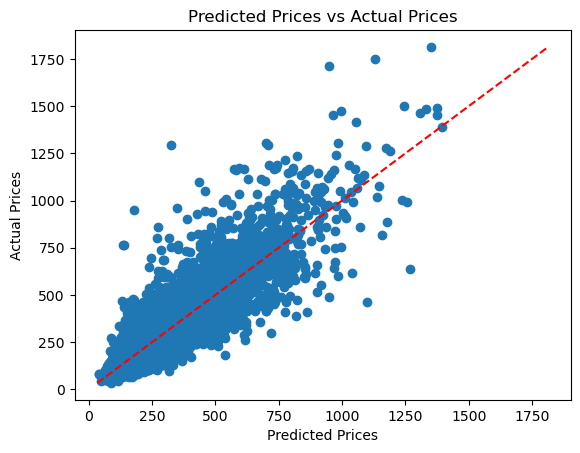

In [127]:
import matplotlib.pyplot as plt

# x = predicted prices  and y = actual prices
plt.scatter(y_test_pred, y_test_std)
#ideal line
plt.plot([y_test_std.min(), y_test_std.max()], [y_test_std.min(), y_test_std.max()], 'r--')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted Prices vs Actual Prices')
plt.show()

We know that each data point in the scatter plot represents an observation in the test set.

We observe that the predicted prices align closely with the actual prices along a diagonal line from the bottom left to the top right, and it indicates that the model's predictions are accurate. Also we see deviations from this diagonal line may suggest biases or patterns in the predictions. The points cluster around a straight line but with some deviations, it suggests that **the model is making consistent but imperfect predictions.**

There are some points consistently lie more above than below the ideal line, it suggests that the model tends to consistently overestimate more than underestimate the prices.

### c) Conclusions: what you’ve learned from this project

**c.1) Best model selection**

Based on the evaluation metrics, the **XGBoost model** outperformed Linear Regression and Decision Tree Regression. The XGBoost model achieved lower mean squared error (MSE) and root mean squared error (RMSE) values on both the training and test sets, indicating better predictive performance. 

The **strengths of the XGBoost model** include:

**- High predictive accuracy:** XGBoost is known for its high performance and accuracy in various machine learning tasks. It uses an ensemble of decision trees and combines their predictions to make more accurate predictions.

**- Handles complex relationships:** XGBoost can capture complex non-linear relationships between the features and the target variable, making it suitable for datasets with intricate patterns.

**- Regularization techniques:** XGBoost includes regularization techniques such as regularization of the loss function and pruning of decision trees, which help prevent overfitting and improve generalization.

However, **XGBoost model also has limitations:**

**- Computational complexity:** XGBoost can be computationally expensive and time-consuming, especially when dealing with large datasets or a large number of features. Training and optimizing an XGBoost model may require significant computational resources.

**- Parameter tuning:** XGBoost has various hyperparameters that need to be tuned to achieve optimal performance. Finding the best combination of hyperparameters can be a trial-and-error process and may require extensive experimentation.

Compared to Linear Regression, XGBoost offers **more flexibility and the ability to capture non-linear relationships**, which can lead to better predictions. Compared to Decision Tree Regression, XGBoost has the advantage of **ensemble learning, regularization techniques, and better handling of overfitting.**

In conclusion, based on its superior performance and strengths in handling complex relationships, the XGBoost model is considered the best choice for predicting Airbnb prices in this case. 

**c.2) Impact of preprocessing techniques**

The application of preprocessing techniques, such as feature scaling and feature selection, can have a significant impact on the performance of a model. In our case, we have applyed feature scaling using StandardScaler and MinMaxScaler, as well as we have performed feature selection by identifying which features to eliminate.

- **Feature Scaling:** Scaling the features using StandardScaler and MinMaxScaler can have a positive impact on the model's performance. Scaling helps bring all the features to a similar scale, which can prevent certain features with larger magnitudes from dominating the learning process. It also helps algorithms that rely on distance calculations or gradient-based optimization methods to converge faster and produce more accurate results.

By applying feature scaling, we ensure that the features have zero mean and unit variance (in the case of StandardScaler) or are scaled to a specific range (in the case of MinMaxScaler). This normalization of the features can improve the model's ability to capture patterns and make accurate predictions.

- **Feature Selection:** Identifying and eliminating irrelevant or redundant features through feature selection can also have a positive impact on the model's performance. By removing unnecessary features, we reduce the complexity of the model and potentially mitigate the risk of overfitting. This can lead to better generalization and improved predictive accuracy on unseen data.

Feature selection helps identify the most informative and important features for the model's predictions. By eliminating less important features, you reduce noise and focus the model's attention on the most relevant aspects of the data, which can improve its ability to make accurate predictions.

In summary, applying feature scaling and performing feature selection can improve the performance of the model. Feature scaling ensures that all features are on a similar scale, which aids in convergence and accuracy. Feature selection helps reduce complexity and focus on the most informative features, leading to better generalization and predictive accuracy. Both techniques contribute to improving the model's ability to capture patterns and make accurate predictions on unseen data.

**c.3) Limitations and future work**

- **Data Availability:** The performance of our models may be limited by the availability and quality of the dataset. If the dataset used for training and evaluation is small or lacks diversity in terms of locations, property types, or other relevant factors, the models may not capture the full range of pricing dynamics. Acquiring a larger and more diverse dataset, including data from various cities, property types, and time periods, would help improve the models' accuracy and generalization.

- **Model Constraints:** In our project, we have used XGBoost, linear regression, and decision tree regression models. While these models have shown good performance, they still have limitations. Linear regression assumes a linear relationship between the features and the target variable, which may not hold true for all cases. Exploring more advanced modeling techniques, such as ensemble methods (e.g., Random Forest, Gradient Boosting), deep learning models, or Bayesian approaches, could potentially capture more complex relationships and further improve predictive performance.

- **Additional Features:** Our models have utilized a set of features to predict Airbnb prices. However, there may be other relevant features that could improve the accuracy of the predictions. For example, including data on property size, amenities, host ratings, or local neighborhood characteristics could provide additional insights into price determination. Conducting thorough feature engineering and considering domain knowledge can help identify and incorporate these additional features.

- **Time Dependency:** Our models may not fully capture the temporal dynamics and trends that influence Airbnb prices. Factors such as seasonality, holidays, or special events can have a significant impact on prices, which might not be adequately captured in our models. Incorporating time-series analysis techniques, such as autoregressive models or seasonal decomposition, and including additional temporal features (e.g., month, year) could help address this limitation and improve the models' performance.

- **Model Interpretability:** XGBoost, as a complex model, provides high predictive performance but can be challenging to interpret. Understanding which features contribute most to the predictions and how they influence the prices is important for making informed decisions. Exploring interpretable models, such as linear regression or decision trees, can provide clearer insights into the pricing dynamics and enhance the interpretability of the models.

- **Outliers and Robustness:** Our models may be sensitive to outliers present in the data. Outliers can disproportionately influence the model's predictions and potentially lead to less accurate results. Applying robust modeling techniques, such as robust regression or outlier detection methods, can help mitigate the impact of outliers and improve the robustness of the models.

In conclusion, there are several areas for future improvement. Acquiring a more diverse and comprehensive dataset, exploring advanced modeling techniques, incorporating additional relevant features, addressing time dependency, ensuring model interpretability, and handling outliers can all contribute to enhancing the accuracy and robustness of the price prediction models.